In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from itertools import combinations

In [3]:
data = pd.read_csv('artwork_details.csv')
data

C:\Users\User\AppData\Local\Temp\ipykernel_6552\1910202983.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('artwork_details.csv')


,url,artwork_name,artist_name,date,style,genre,media,tags,image_url
0,https://www.wikiart.org/en/alvaro-pires-de-evo...,NaN,Álvaro Pires de Évora,47.0,"International Gothic, Early Renaissance",religious painting,NaN,Prophet,https://uploads7.wikiart.org/00312/images/alva...
1,https://www.wikiart.org/en/alvaro-pires-de-evo...,NaN,Álvaro Pires de Évora,48.0,"International Gothic, Early Renaissance",religious painting,NaN,"Holy places, Prophet",https://uploads4.wikiart.org/00312/images/alva...
2,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1401.0,Early Renaissance,sculpture,bronze,"Christianity, Old-Testament, Isaac, sacrifices...",https://uploads0.wikiart.org/images/filippo-br...
3,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1402.0,Early Renaissance,sculpture,NaN,"Christianity, Virgin-and-Child, Classical scul...",https://uploads3.wikiart.org/images/filippo-br...
4,https://www.wikiart.org/en/ghiberti/the-sacrif...,NaN,Lorenzo Ghiberti,1402.0,Early Renaissance,sculpture,bronze,"Bronze sculpture, Statue, Relief",https://uploads1.wikiart.org/00164/images/ghib...
...,...,...,...,...,...,...,...,...,...
73982,https://www.wikiart.org/en/roger-bissi-re/la-c...,NaN,Roger Bissière,1947.0,Art Informel,figurative,NaN,Textile,https://uploads0.wikiart.org/images/roger-biss...
73983,https://www.wikiart.org/en/jean-fautrier/hosta...,NaN,Jean Fautrier,1947.0,"Art Informel, Existential Art",figurative,NaN,NaN,https://uploads1.wikiart.org/images/jean-fautr...
73984,https://www.wikiart.org/en/willi-baumeister/sh...,NaN,Willi Baumeister,1947.0,Art Informel,abstract,NaN,Sketch,https://uploads6.wikiart.org/images/willi-baum...
73985,https://www.wikiart.org/en/jacques-busse/etang...,NaN,Jacques Busse,1947.0,Art Informel,abstract,NaN,NaN,https://uploads2.wikiart.org/images/jacques-bu...


tagı olmayan eserleri inceleyelim

C:\Users\User\AppData\Local\Temp\ipykernel_18264\3337084809.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


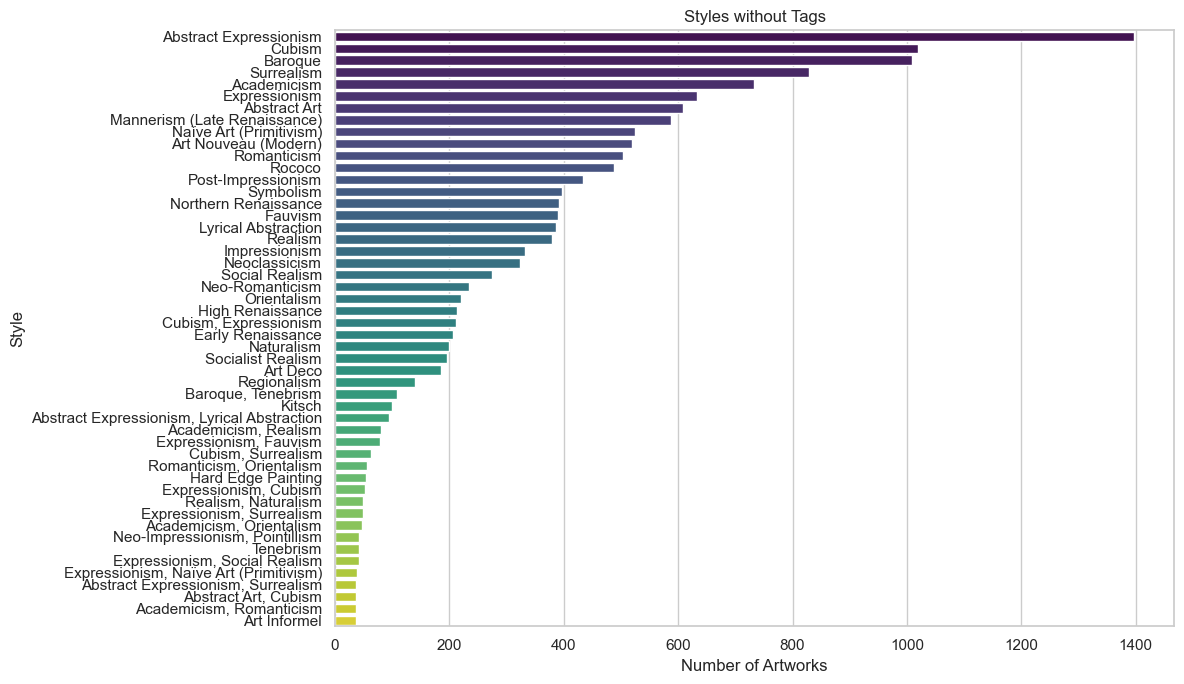

C:\Users\User\AppData\Local\Temp\ipykernel_18264\3337084809.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


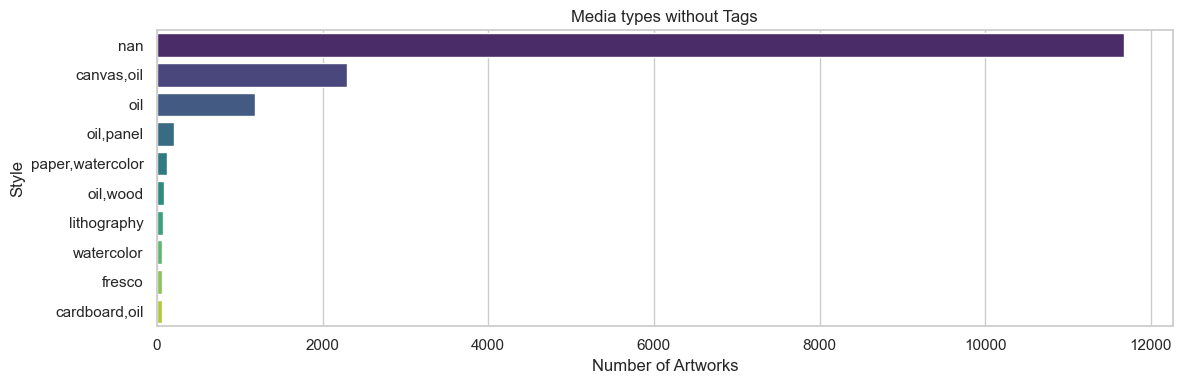

C:\Users\User\AppData\Local\Temp\ipykernel_18264\3337084809.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")


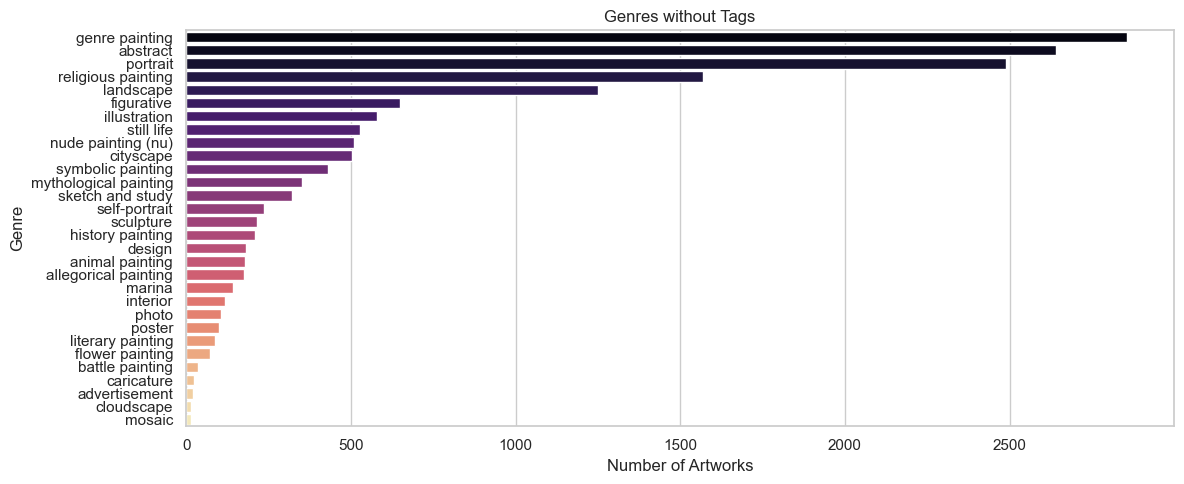

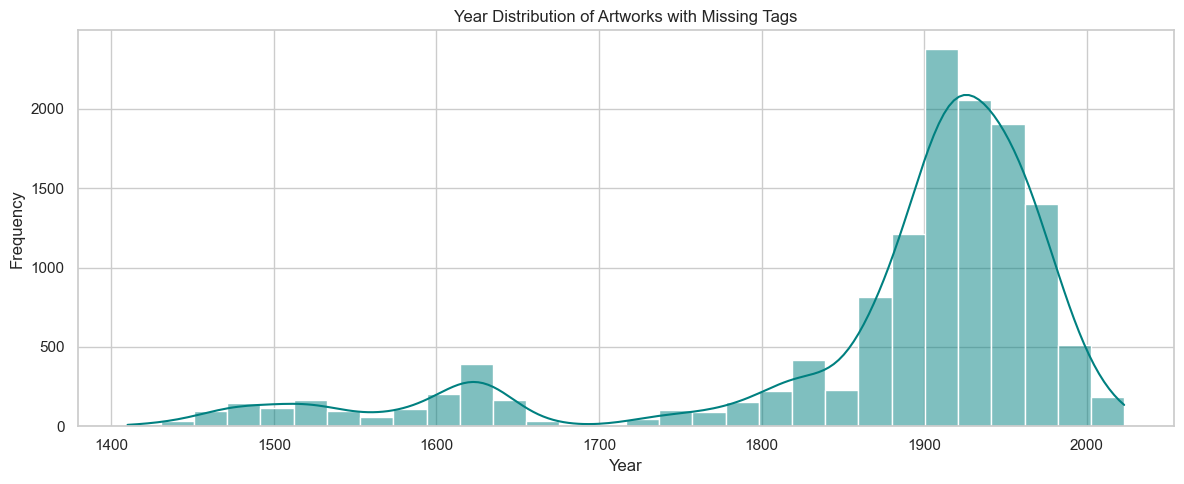

In [16]:
# Filter artworks with missing tags
missing_tags_df = data[data['tags'].isna()]

# Set style
sns.set(style="whitegrid")

# Plot: Styles
plt.figure(figsize=(12, 7))
style_counts = missing_tags_df['style'].value_counts().head(50)
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Styles without Tags")
plt.xlabel("Number of Artworks")
plt.ylabel("Style")
plt.tight_layout()
plt.show()

# Plot: Media
# Normalize media: sort the components within each media entry
media = missing_tags_df['media'].fillna('NaN').apply(lambda x: ','.join(sorted([m.strip().lower() for m in x.split(',')])))
plt.figure(figsize=(12, 4))
style_counts = media.value_counts().head(10)
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Media types without Tags")
plt.xlabel("Number of Artworks")
plt.ylabel("Style")
plt.tight_layout()
plt.show()

# Plot: Genres
plt.figure(figsize=(12, 5))
genre_counts = missing_tags_df['genre'].value_counts().head(30)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Genres without Tags")
plt.xlabel("Number of Artworks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Plot: Years (histogram)
plt.figure(figsize=(12, 5))
sns.histplot(missing_tags_df['date'].dropna(), bins=30, kde=True, color="teal")
plt.title("Year Distribution of Artworks with Missing Tags")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Bütün veri için inceleyelim

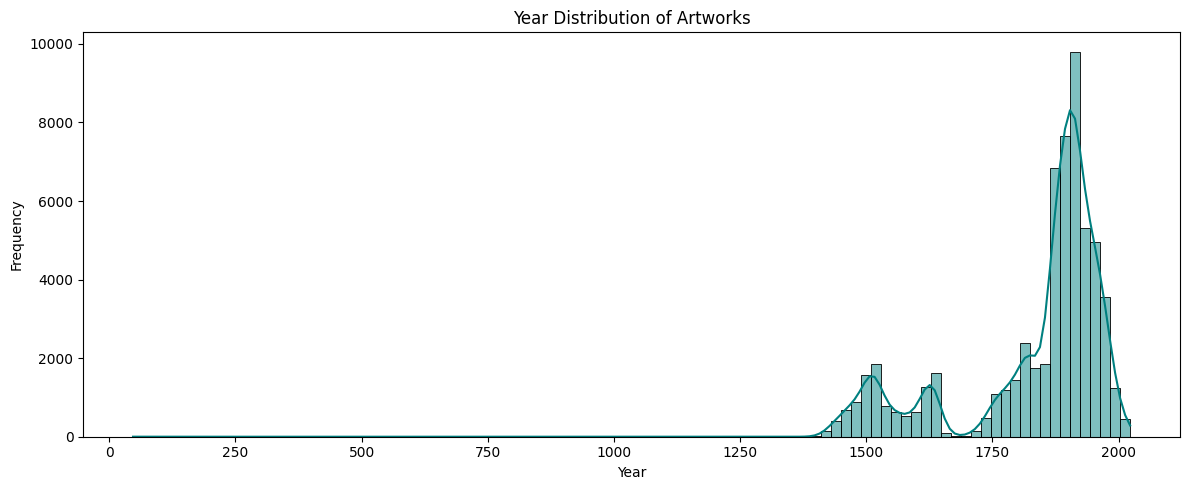

In [6]:
# Plot: Years (histogram)
plt.figure(figsize=(12, 5))
sns.histplot(data['date'].dropna(), bins=100, kde=True, color="teal")
plt.title("Year Distribution of Artworks")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6552\377019025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


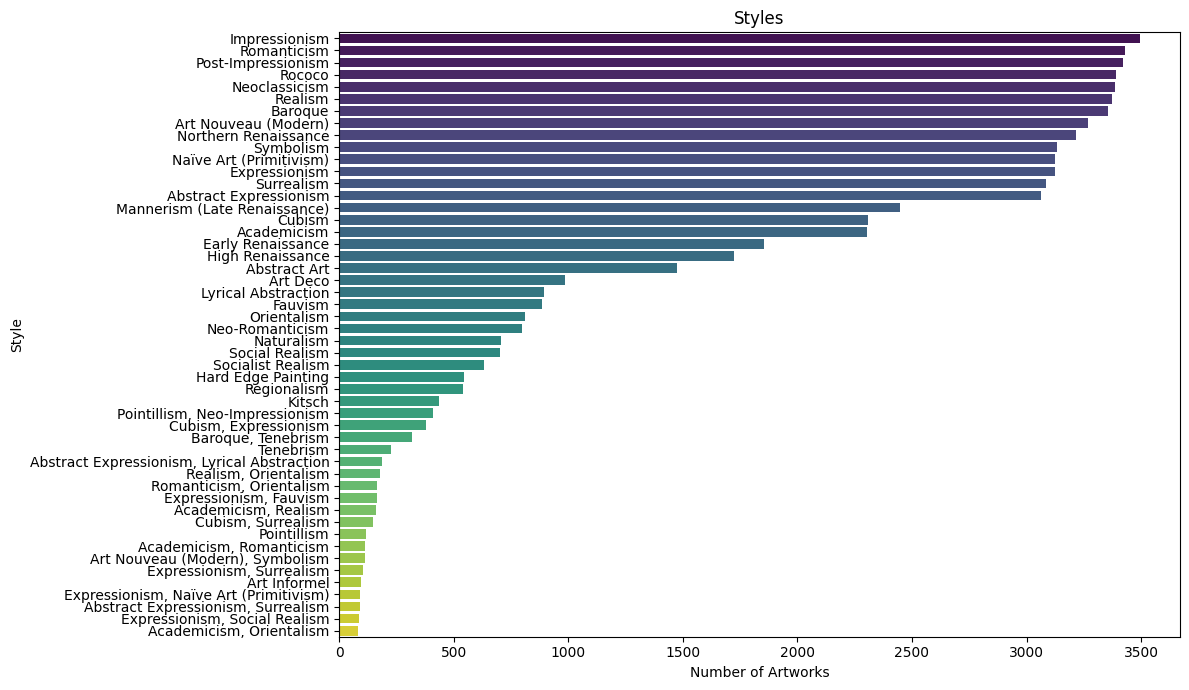

C:\Users\User\AppData\Local\Temp\ipykernel_6552\377019025.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")


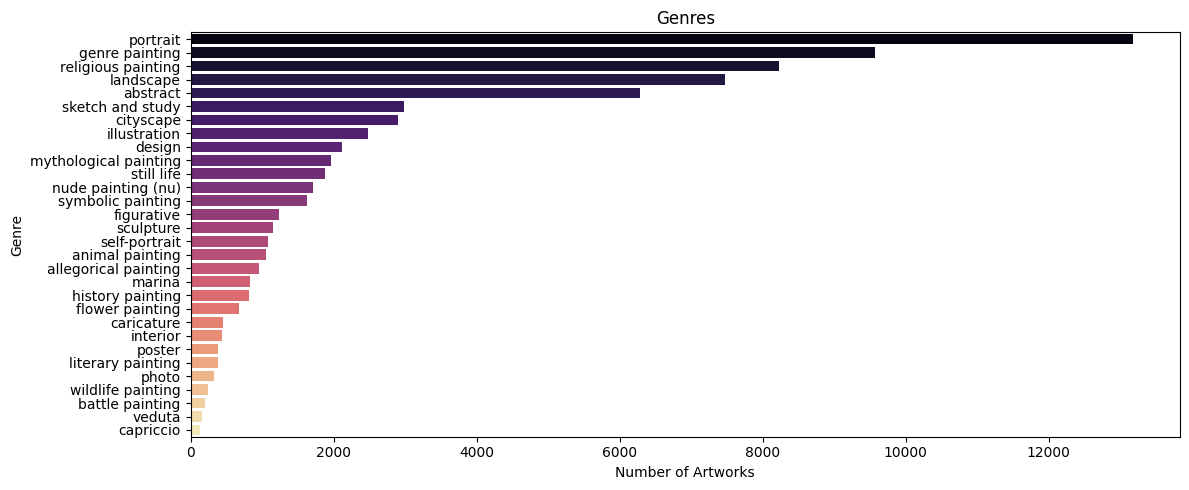

In [7]:
plt.figure(figsize=(12, 7))
style_counts = data['style'].value_counts().head(50)
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Styles")
plt.xlabel("Number of Artworks")
plt.ylabel("Style")
plt.tight_layout()
plt.show()

# Plot: Genres
plt.figure(figsize=(12, 5))
genre_counts = data['genre'].value_counts().head(30)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Genres")
plt.xlabel("Number of Artworks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18264\918428242.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


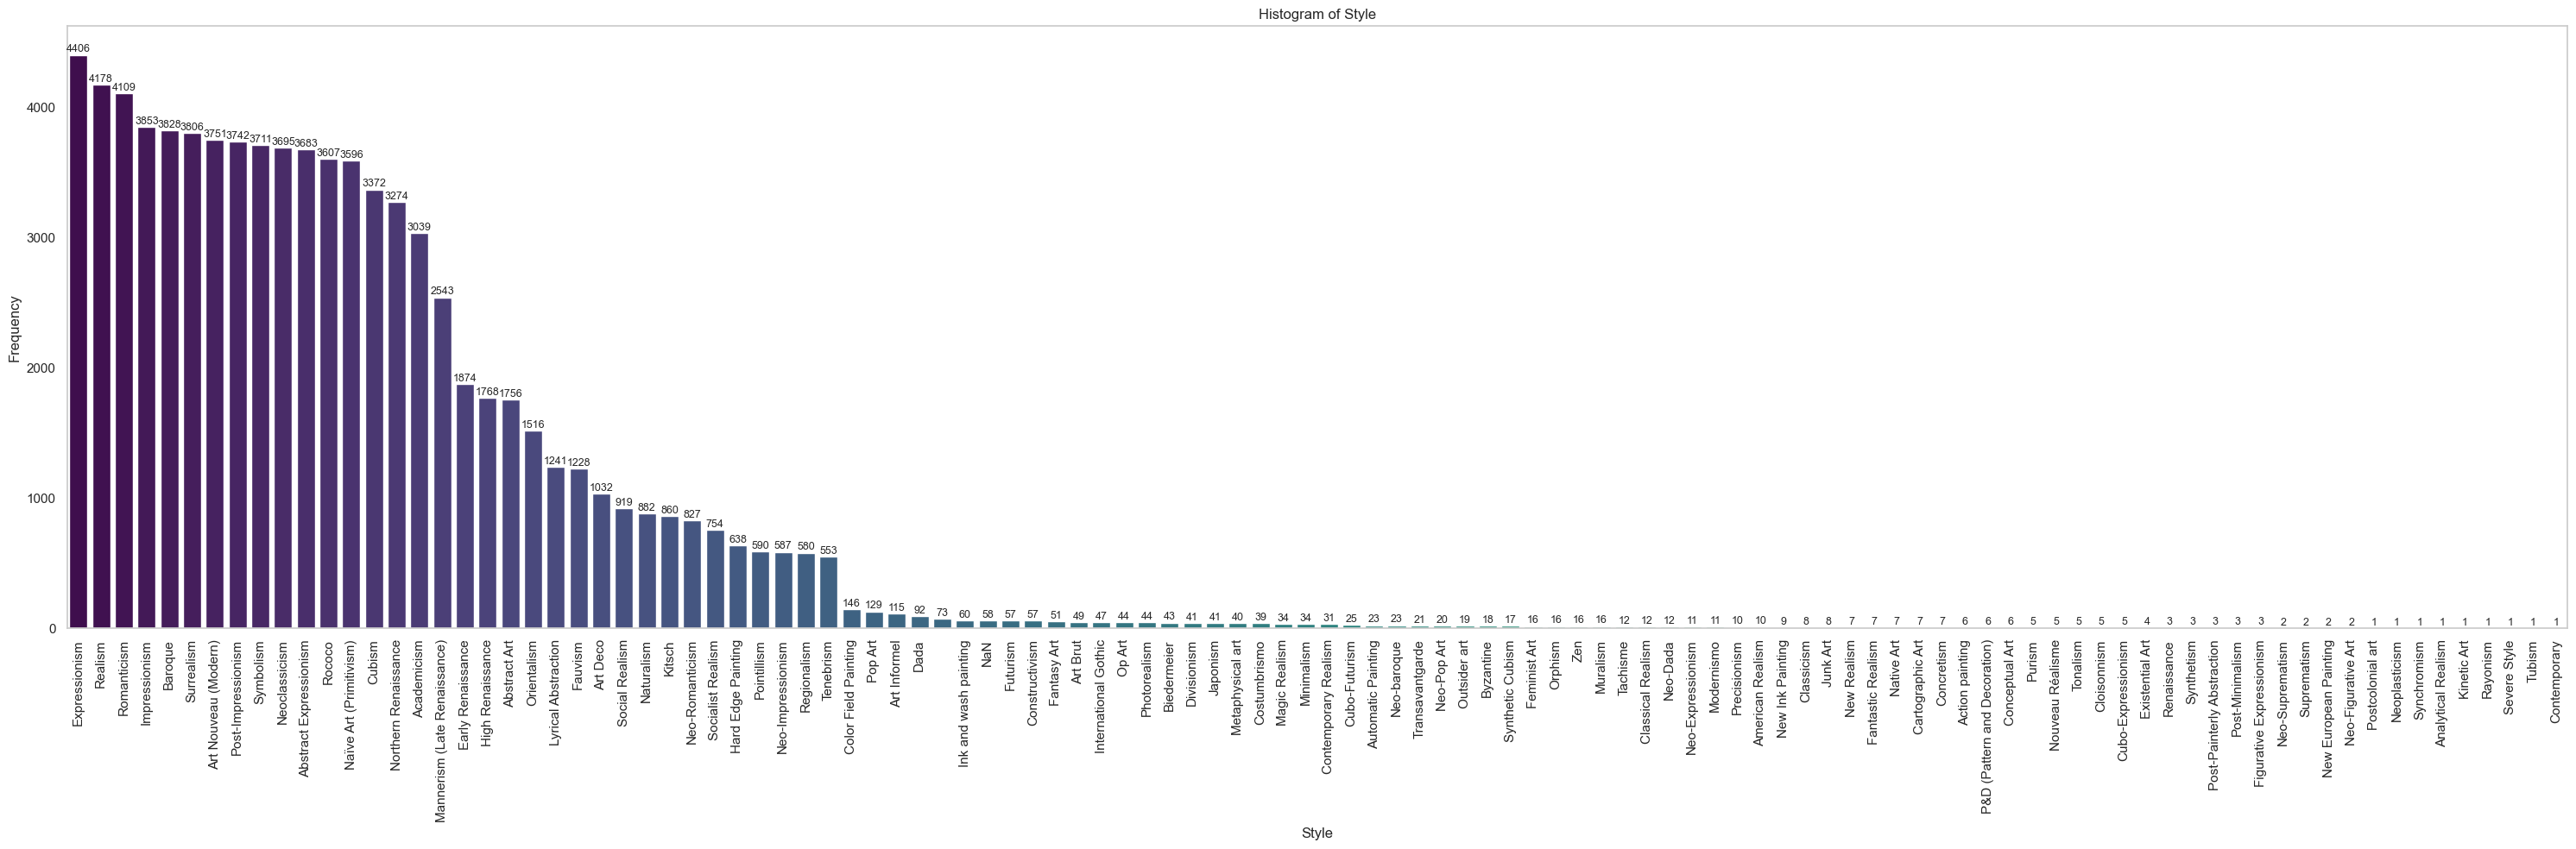

C:\Users\User\AppData\Local\Temp\ipykernel_18264\918428242.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


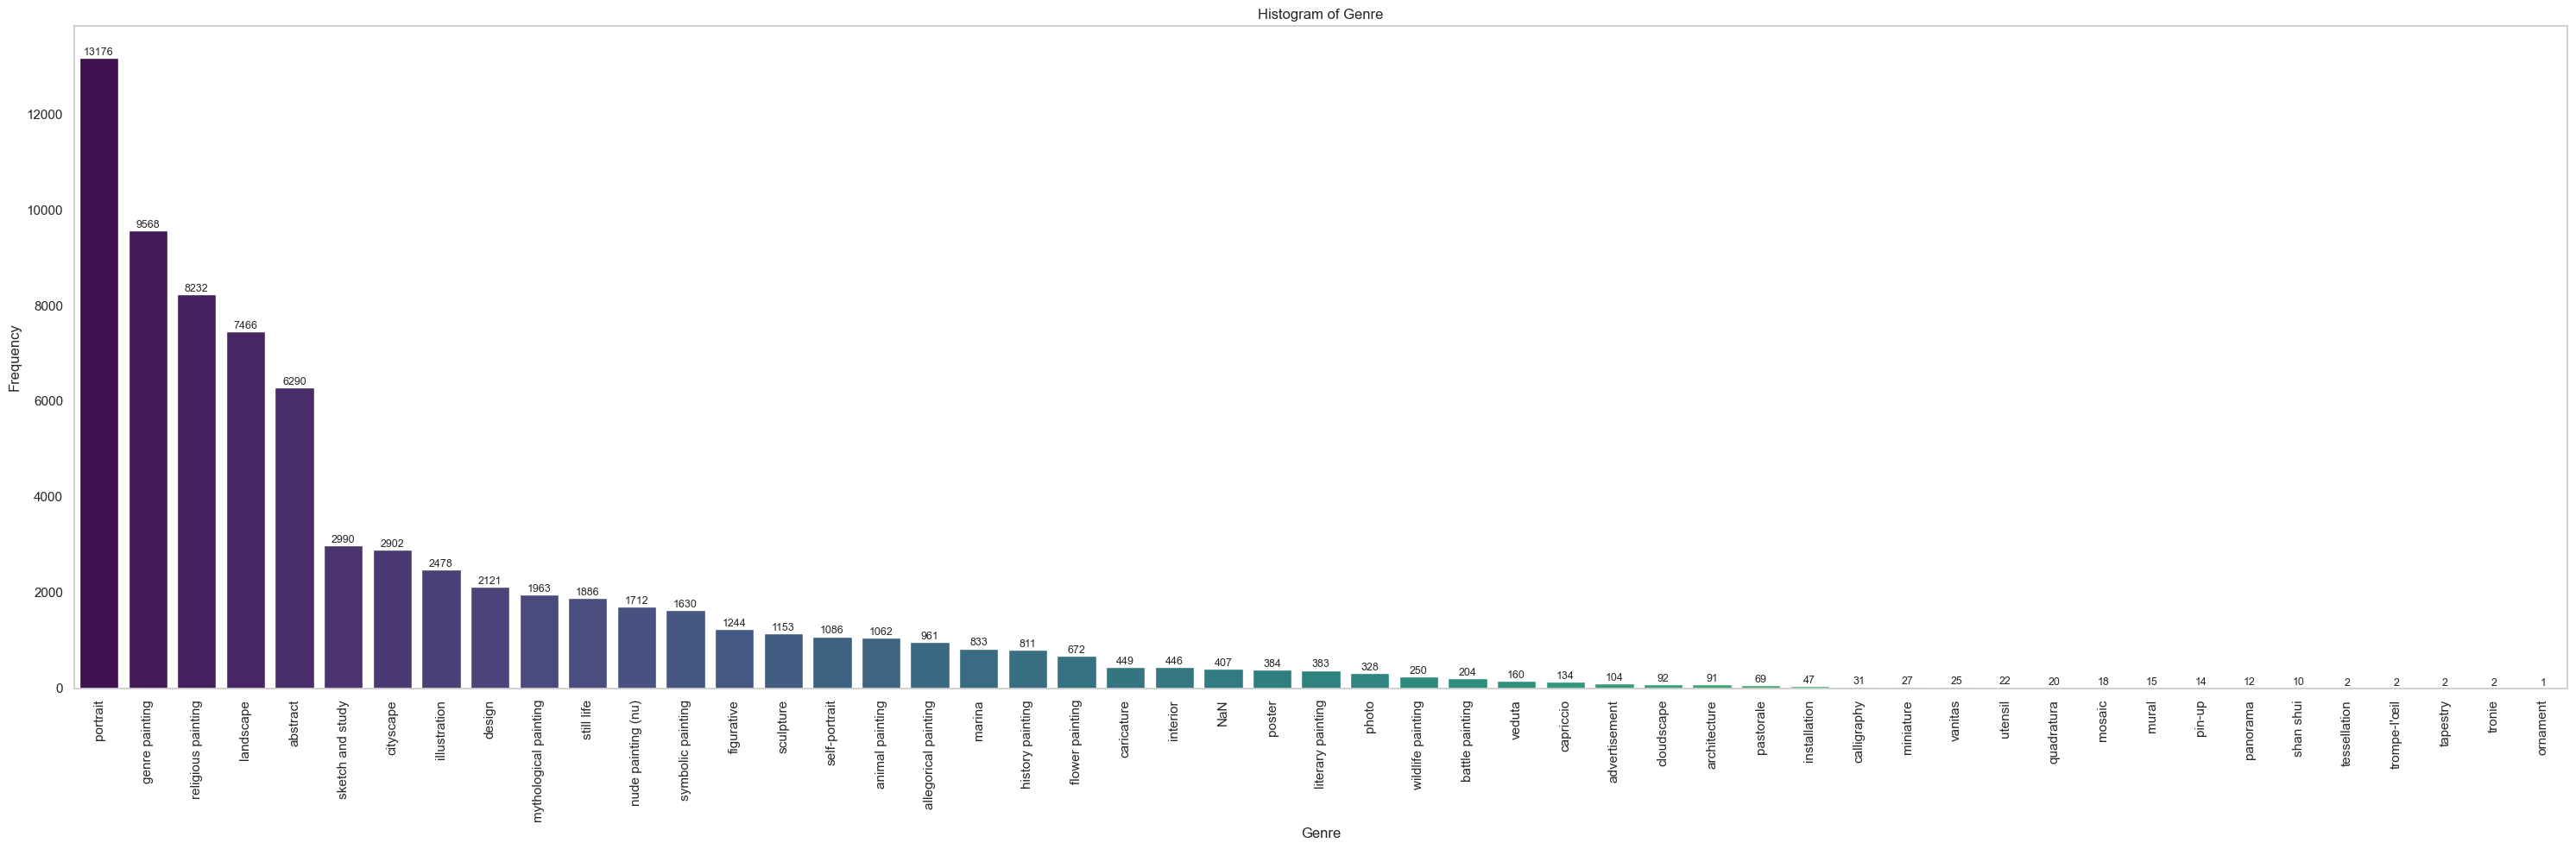

C:\Users\User\AppData\Local\Temp\ipykernel_18264\918428242.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


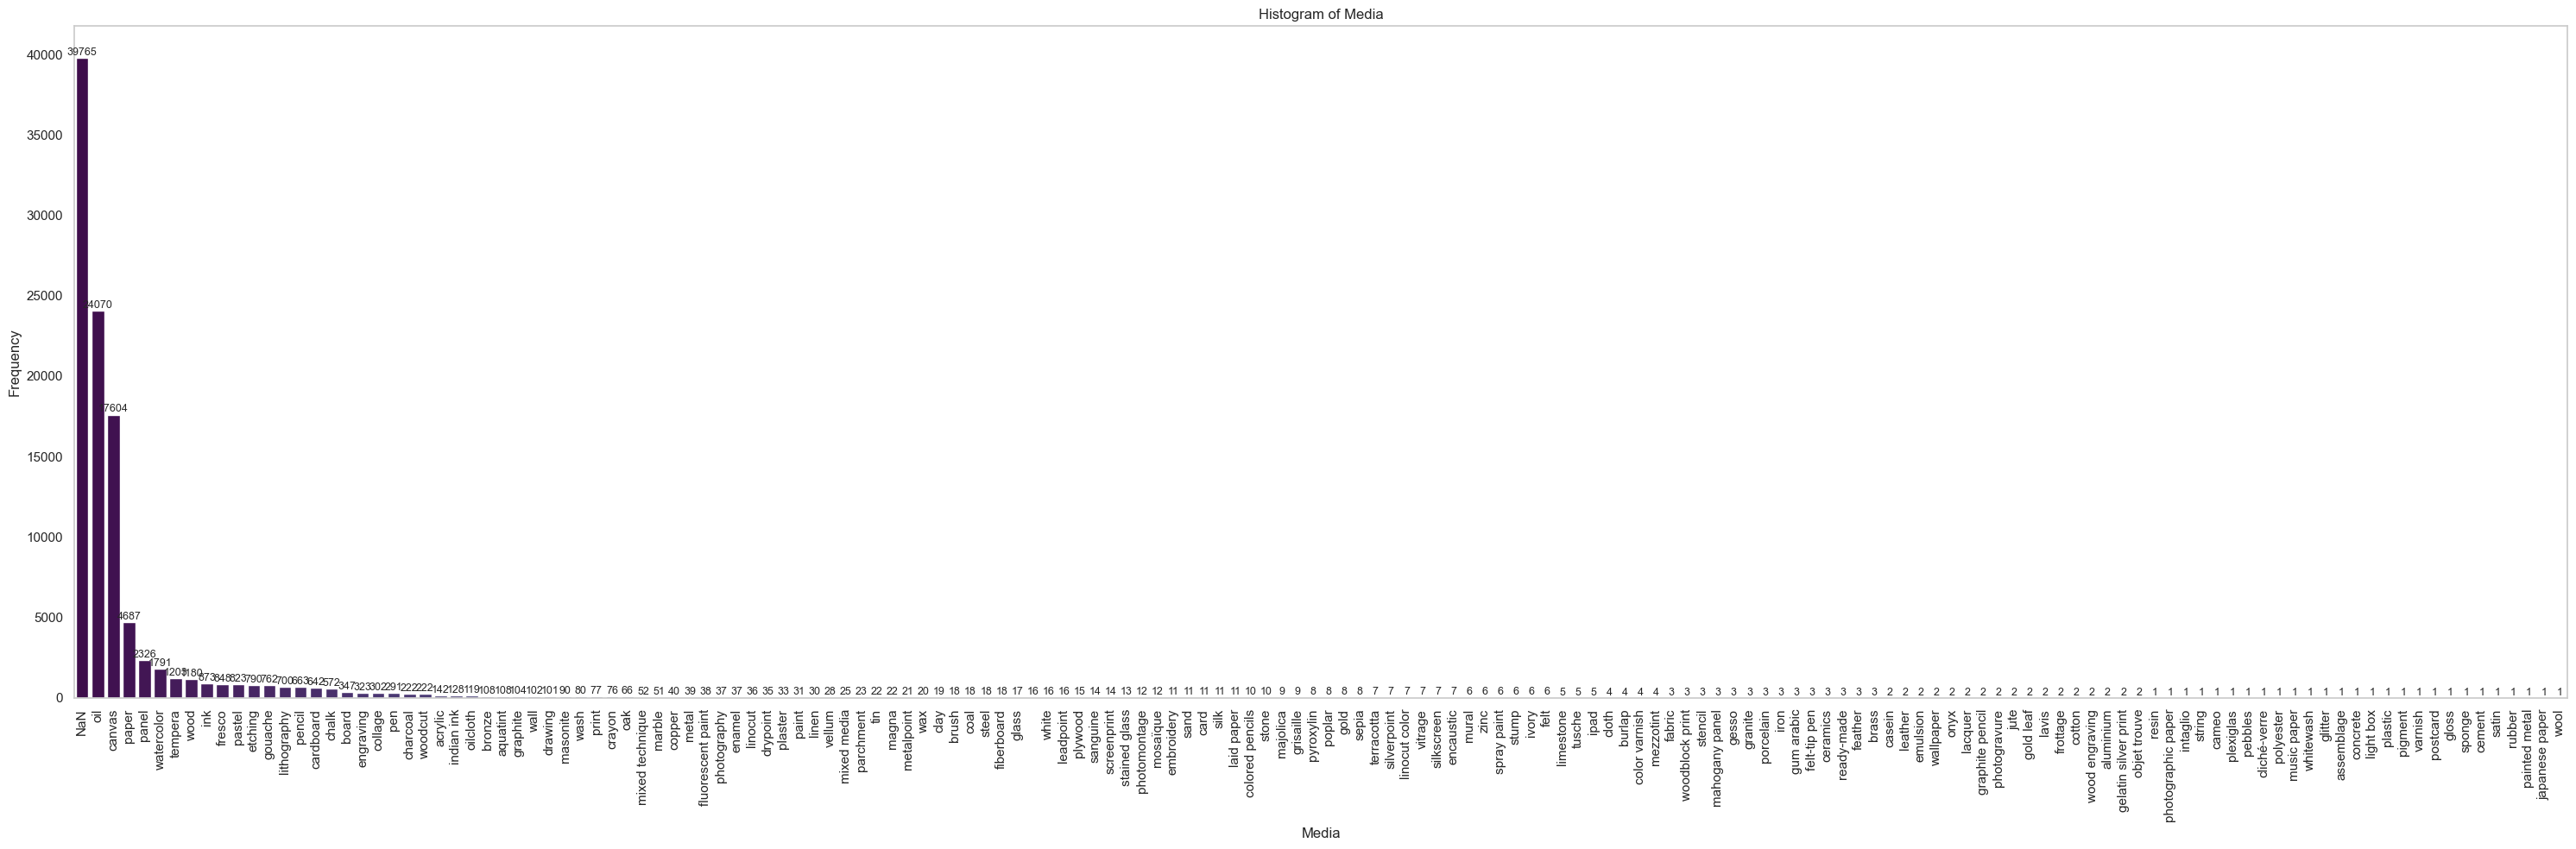

C:\Users\User\AppData\Local\Temp\ipykernel_18264\918428242.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


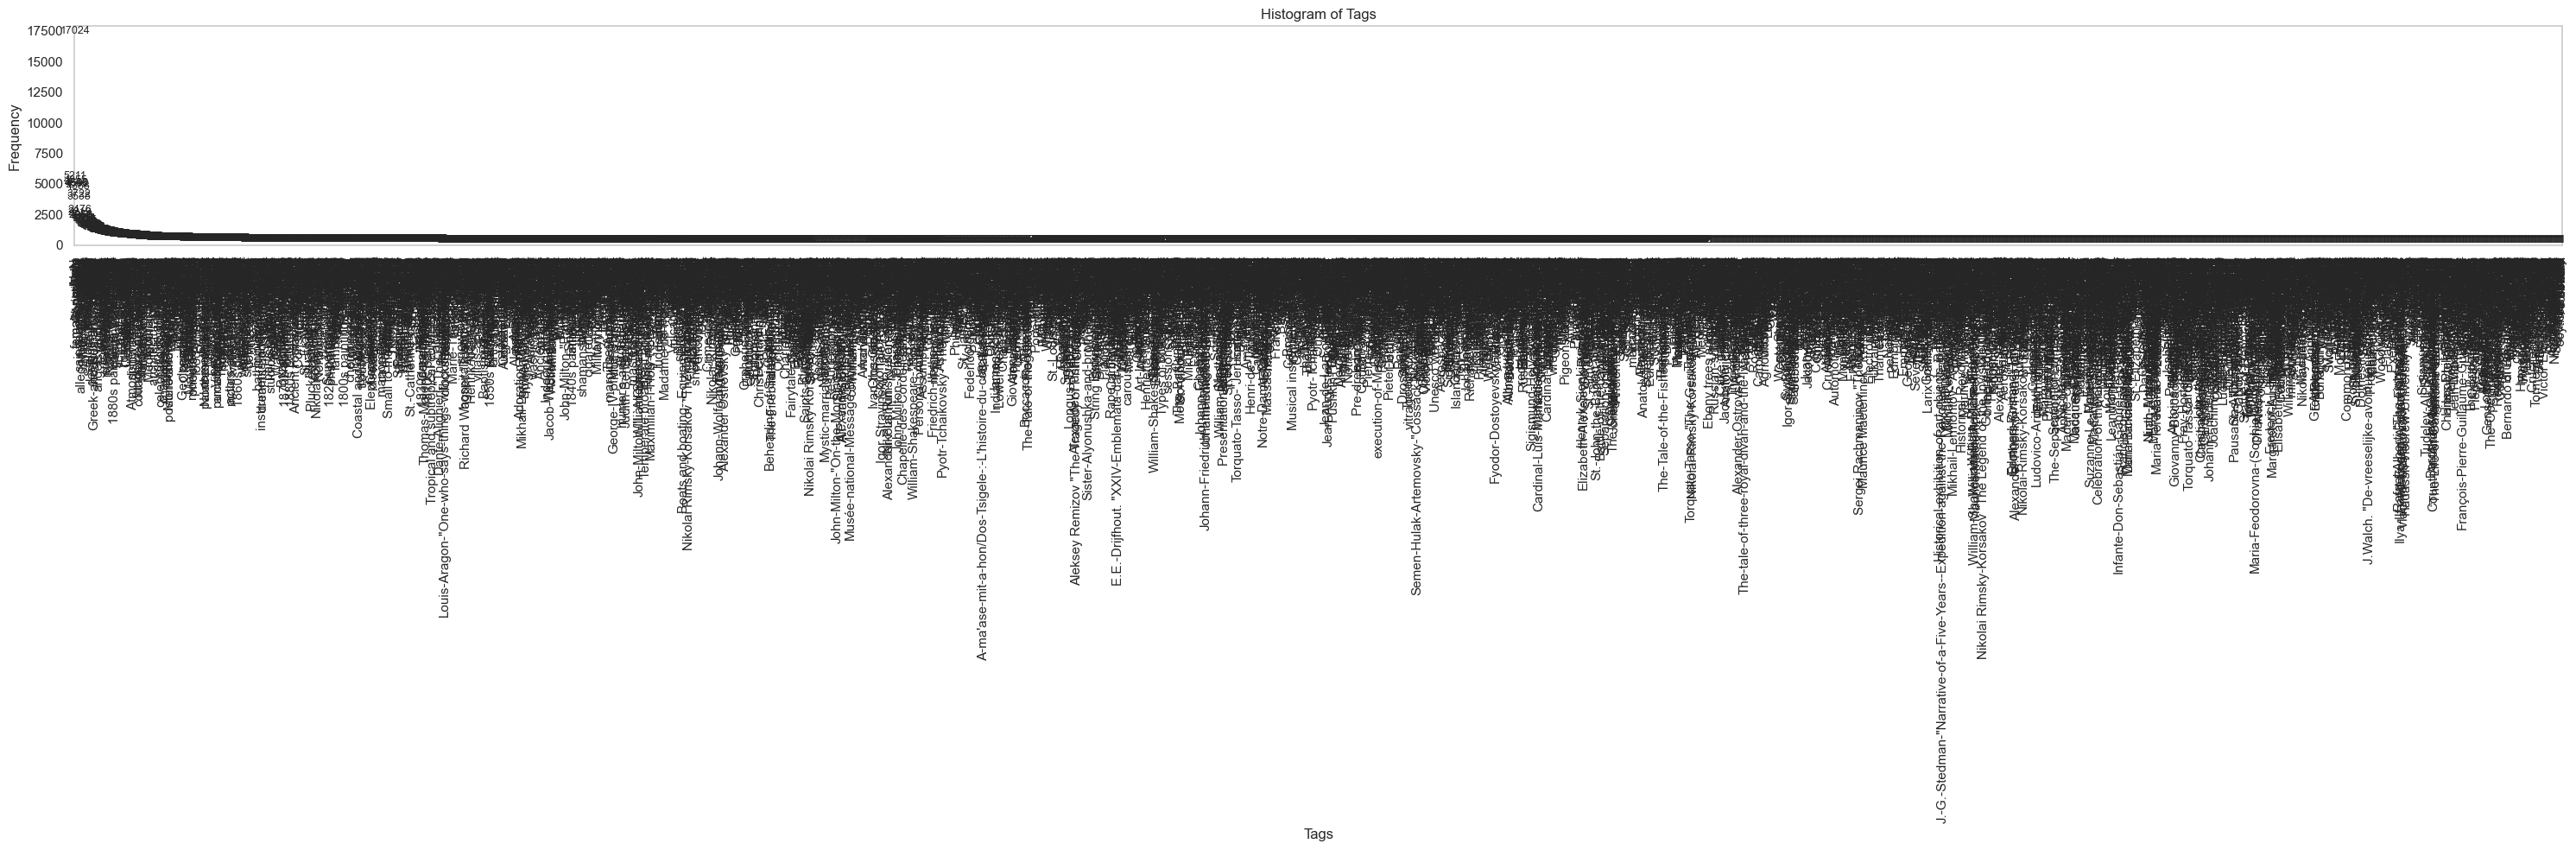

In [17]:
# Set style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})

def plot_histogram(column_name, title):
    all_values = []

    for val in data[column_name].fillna("NaN"):
        all_values.extend([v.strip() for v in str(val).split(',')])

    value_counts = pd.Series(all_values).value_counts()
    #if column_name == 'tags': value_counts = value_counts[value_counts >= 20000]

    # Plot
    plt.figure(figsize=(30, 10))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

    # Add count labels
    for i, count in enumerate(value_counts.values):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=9)

    plt.title(f"Histogram of {title}")
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot each requested column
plot_histogram("style", "Style")
plot_histogram("genre", "Genre")
plot_histogram("media", "Media")
plot_histogram("tags", "Tags")


In [23]:
# Load the dataset
data = pd.read_csv('artwork_details.csv')

# Collect and flatten all tags
all_tags = []
for val in data['tags'].fillna("NaN"):
    all_tags.extend([t.strip() for t in str(val).split(',')])

# Count frequencies
tag_counts = pd.Series(all_tags).value_counts()

# Get top 200 tags
top200 = tag_counts.head(200)

# Print nicely
print("Top 200 Tags and Their Frequencies:\n")
for tag, freq in top200.items():
    print(f"{tag}: {freq}")


Top 200 Tags and Their Frequencies:

NaN: 17024
Lady: 5211
male-portraits: 4855
female-portraits: 4666
Christianity: 4646
Tree: 4592
Mythology: 4388
Sketch: 3722
Sky: 3538
saints-and-apostles: 2476
famous-people: 2219
Plant: 2056
Gentleman: 1960
allegories-and-symbols: 1956
Chin: 1768
forests-and-trees: 1765
Human: 1759
Line: 1754
Natural landscape: 1622
animals: 1615
Head: 1560
Holy places: 1493
Text: 1356
Jesus-Christ: 1328
Forehead: 1296
female-nude: 1262
Stock photography: 1231
Figure drawing: 1225
Cheek: 1182
Still life photography: 1179
Organism: 1176
Textile: 1158
Face: 1132
designs-and-sketches: 1092
Water: 1070
Botany: 1044
houses-and-buildings: 1036
Greek-and-Roman-Mythology: 977
Rome: 975
Vehicle: 970
Flower: 951
Prophet: 912
Font: 904
Pattern: 868
Virgin-Mary: 862
angels-and-archangels: 846
Woody plant: 838
Nose: 836
boats-and-ships: 834
History: 816
Building: 809
Orange: 792
Nature: 785
Picture frame: 754
flowers-and-plants: 753
Virgin-and-Child: 728
Boat: 709
children por

C:\Users\User\AppData\Local\Temp\ipykernel_18264\188749199.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('artwork_details.csv')


C:\Users\User\AppData\Local\Temp\ipykernel_18264\1661992548.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_combination_counts.values, y=media_combination_counts.index, palette="crest")


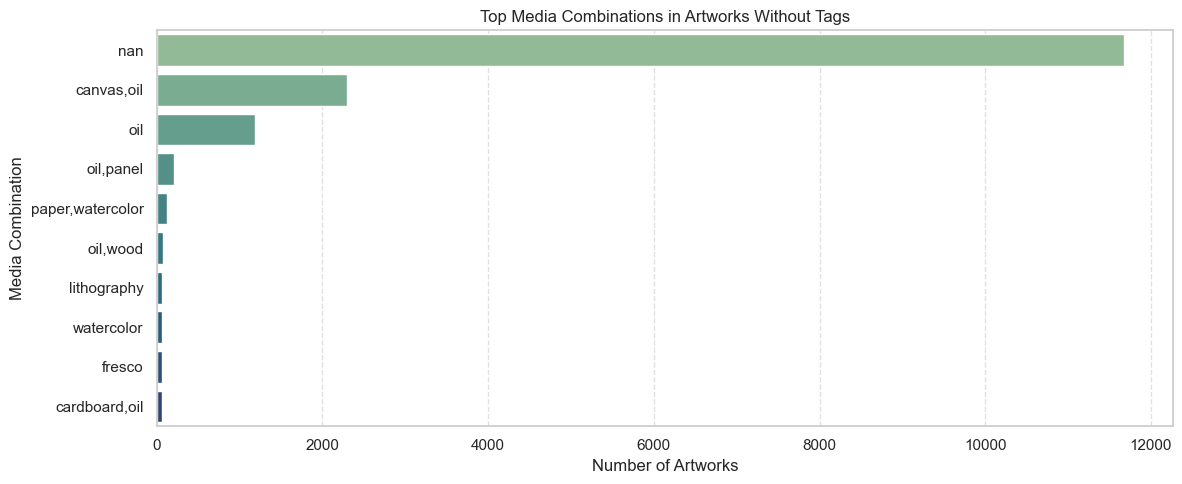

In [24]:
#this code is to examine media without separating the media elements
# Step 1: Drop NaNs and normalize media strings
normalized_media = (
    missing_tags_df['media']
    .fillna('Nan')
    .apply(lambda x: ','.join(sorted(m.strip().lower() for m in x.split(','))))
)

# Step 2: Count frequency of each unique media combination
media_combination_counts = normalized_media.value_counts().head(10)  # Change 50 to 100 for more

# Step 3: Plot the histogram
plt.figure(figsize=(12, 5))
sns.barplot(x=media_combination_counts.values, y=media_combination_counts.index, palette="crest")
plt.title("Top Media Combinations in Artworks Without Tags")
plt.xlabel("Number of Artworks")
plt.ylabel("Media Combination")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


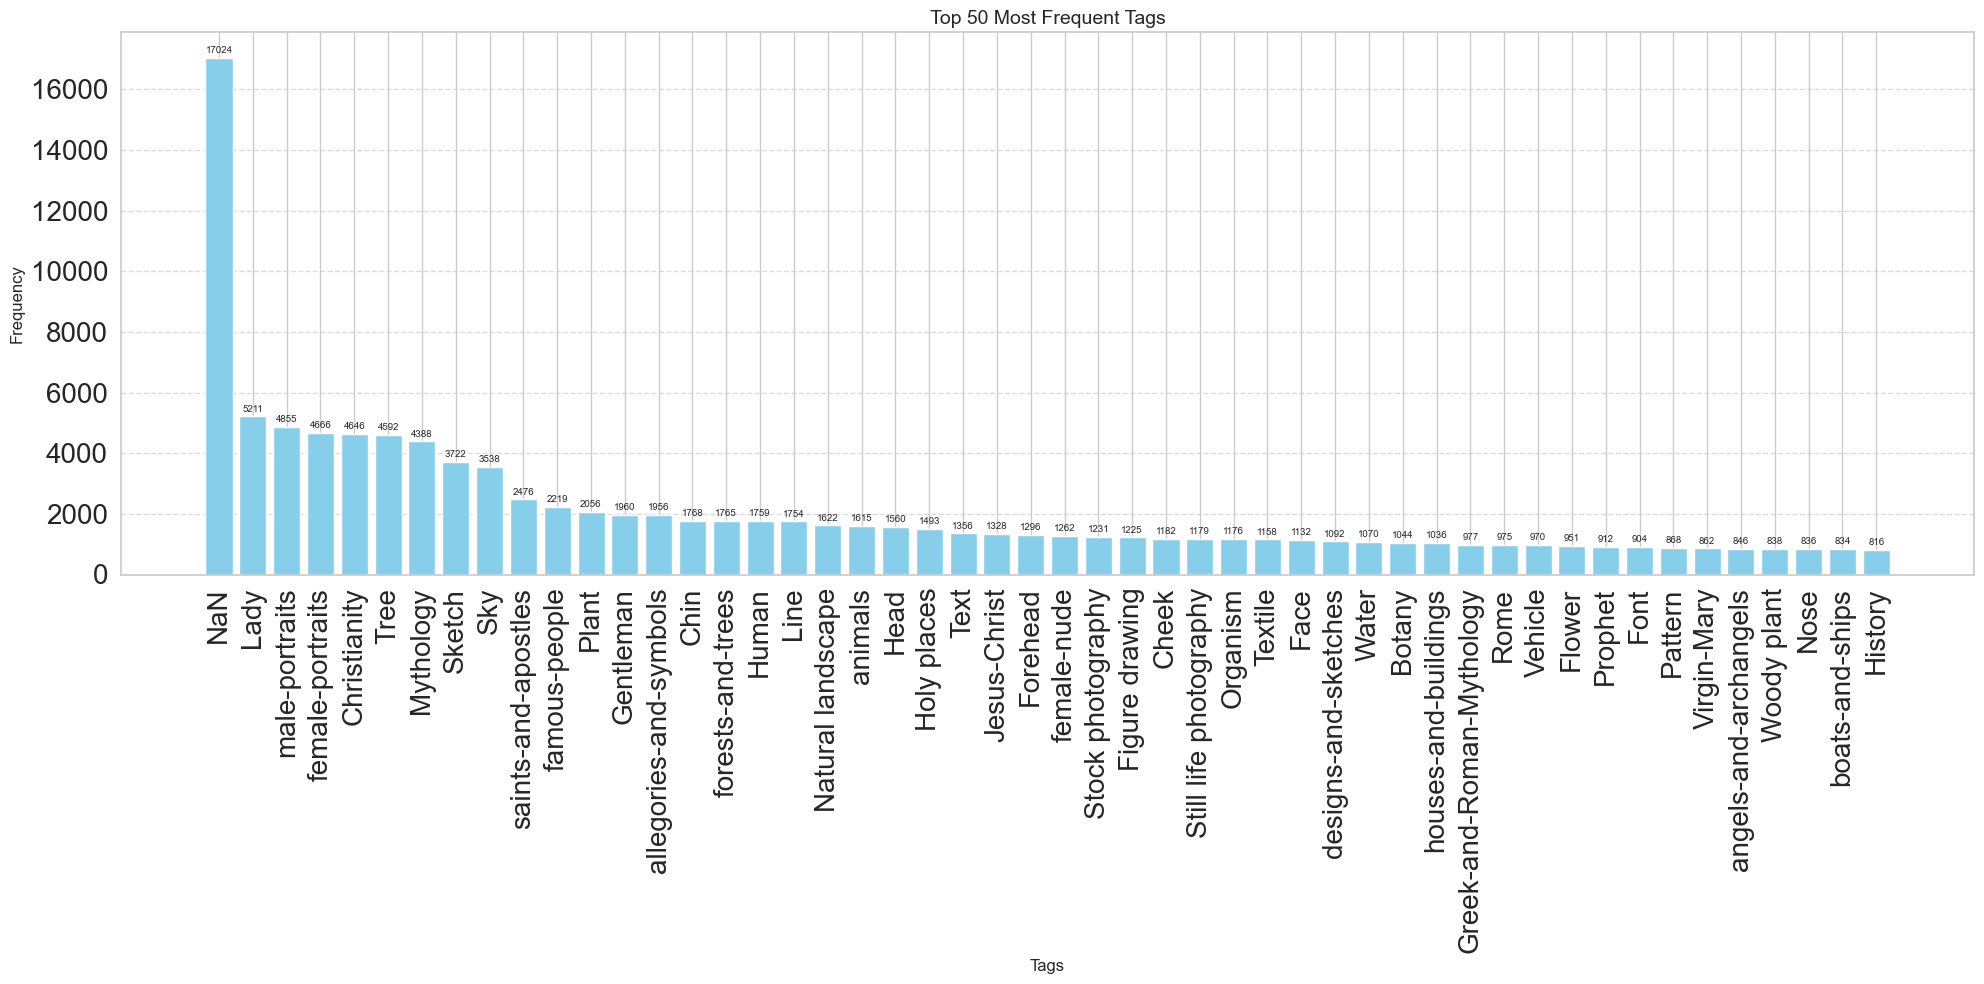

In [25]:
top50 = tag_counts.head(50)

# Plotting
plt.figure(figsize=(20, 10))
bars = plt.bar(top50.index, top50.values, color='skyblue')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add frequency labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 2),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=7)

plt.title("Top 50 Most Frequent Tags", fontsize=14)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
# Split tags into list format
transactions = data['tags'].dropna().apply(lambda x: [tag.strip() for tag in x.split(',')])

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)  # adjust support threshold if needed

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)  # can adjust threshold

# Sort by lift or confidence
rules = rules.sort_values(by='confidence', ascending=False)

# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

              antecedents              consequents   support  confidence  \
64          (Woody plant)                   (Tree)  0.014711    1.000000   
89   (Woody plant, Plant)                   (Tree)  0.010112    1.000000   
28  (saints-and-apostles)           (Christianity)  0.041799    0.961632   
23          (Virgin-Mary)           (Christianity)  0.014378    0.950116   
24     (Virgin-and-Child)           (Christianity)  0.012008    0.939560   
..                    ...                      ...       ...         ...   
27         (Christianity)  (angels-and-archangels)  0.010779    0.132157   
45            (Mythology)                  (Human)  0.010094    0.131039   
92                 (Tree)     (Woody plant, Plant)  0.010112    0.125436   
56                 (Tree)                 (Nature)  0.010042    0.124564   
17       (male-portraits)                   (Chin)  0.010340    0.121318   

         lift  
64  12.404834  
89  12.404834  
28  11.790233  
23  11.649044  
24  11.

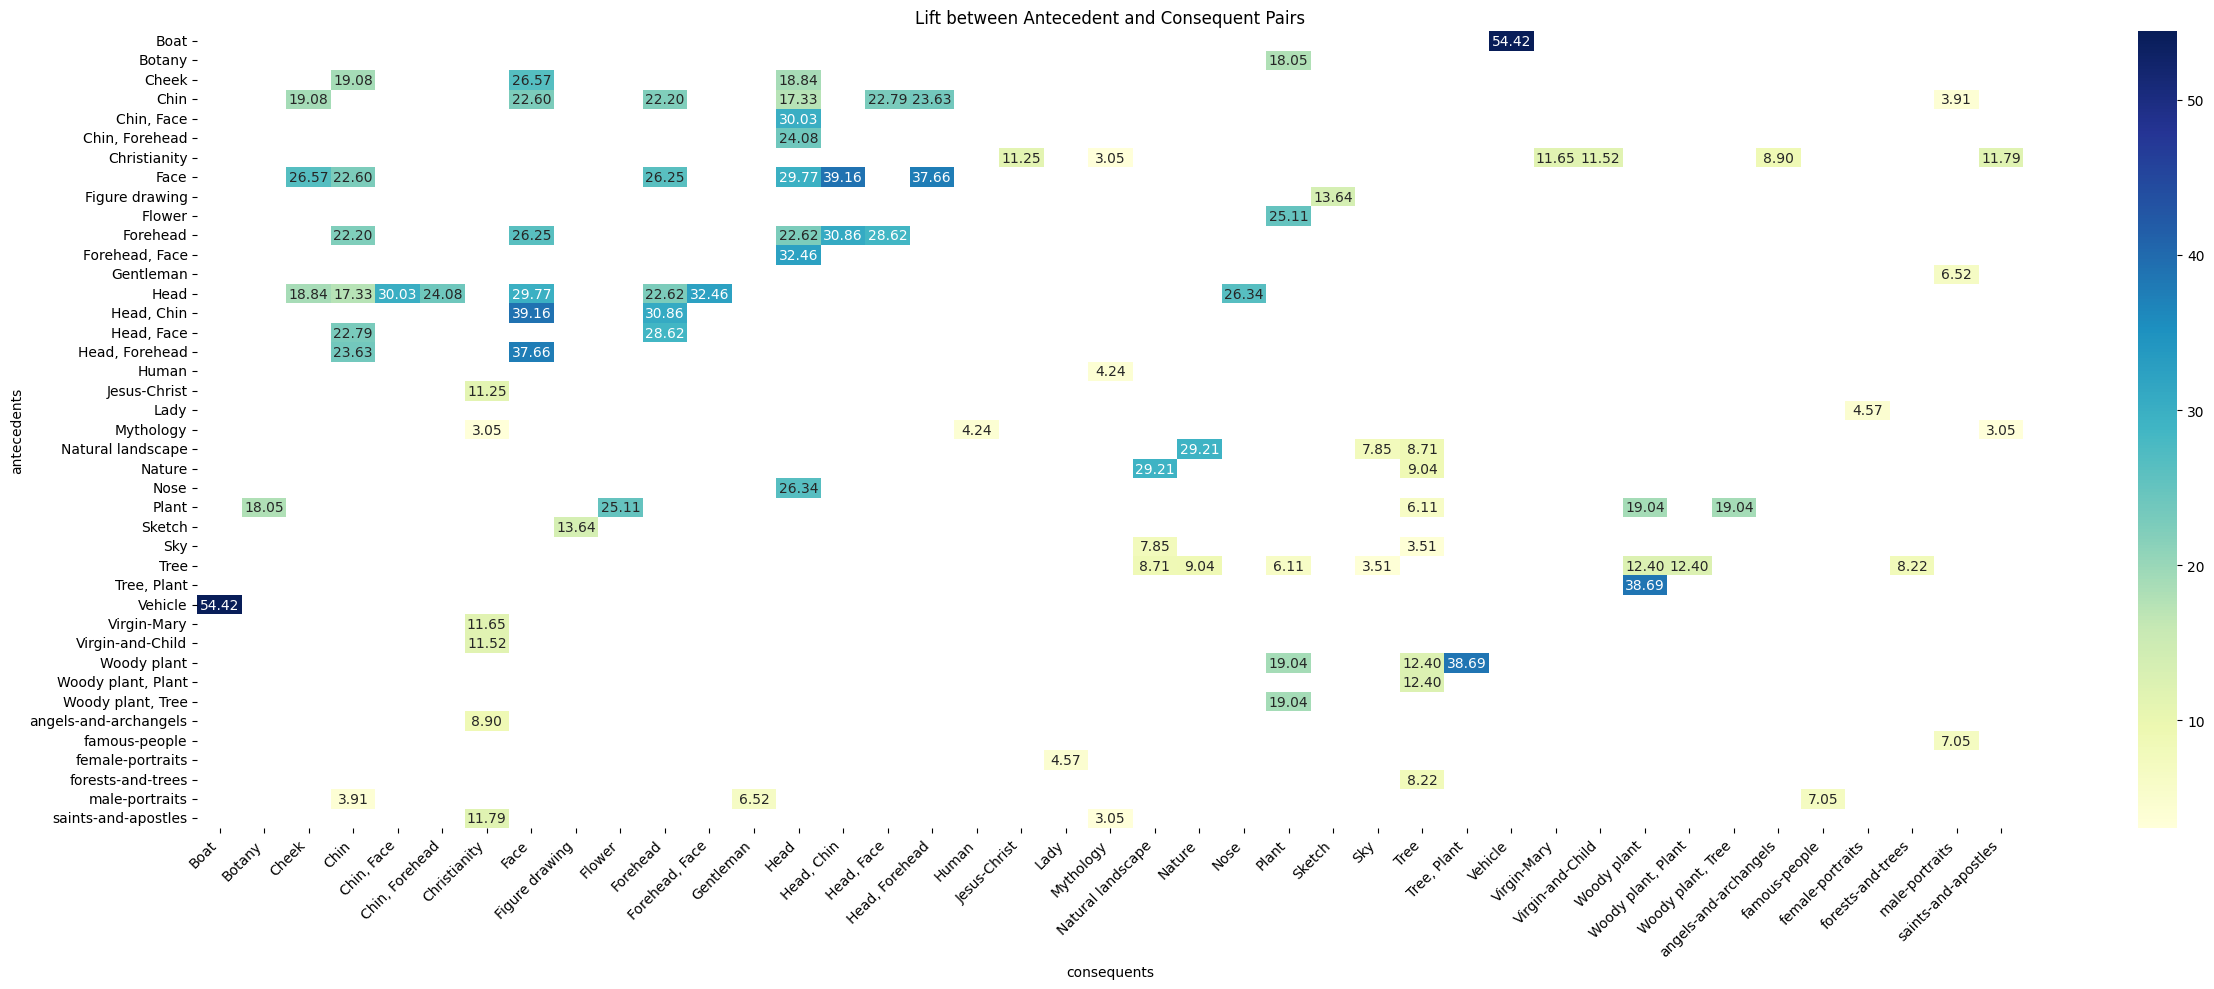

In [19]:
import numpy as np
import seaborn as sns

# Convert frozensets to strings for heatmap indexing
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(25, 10))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Lift between Antecedent and Consequent Pairs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


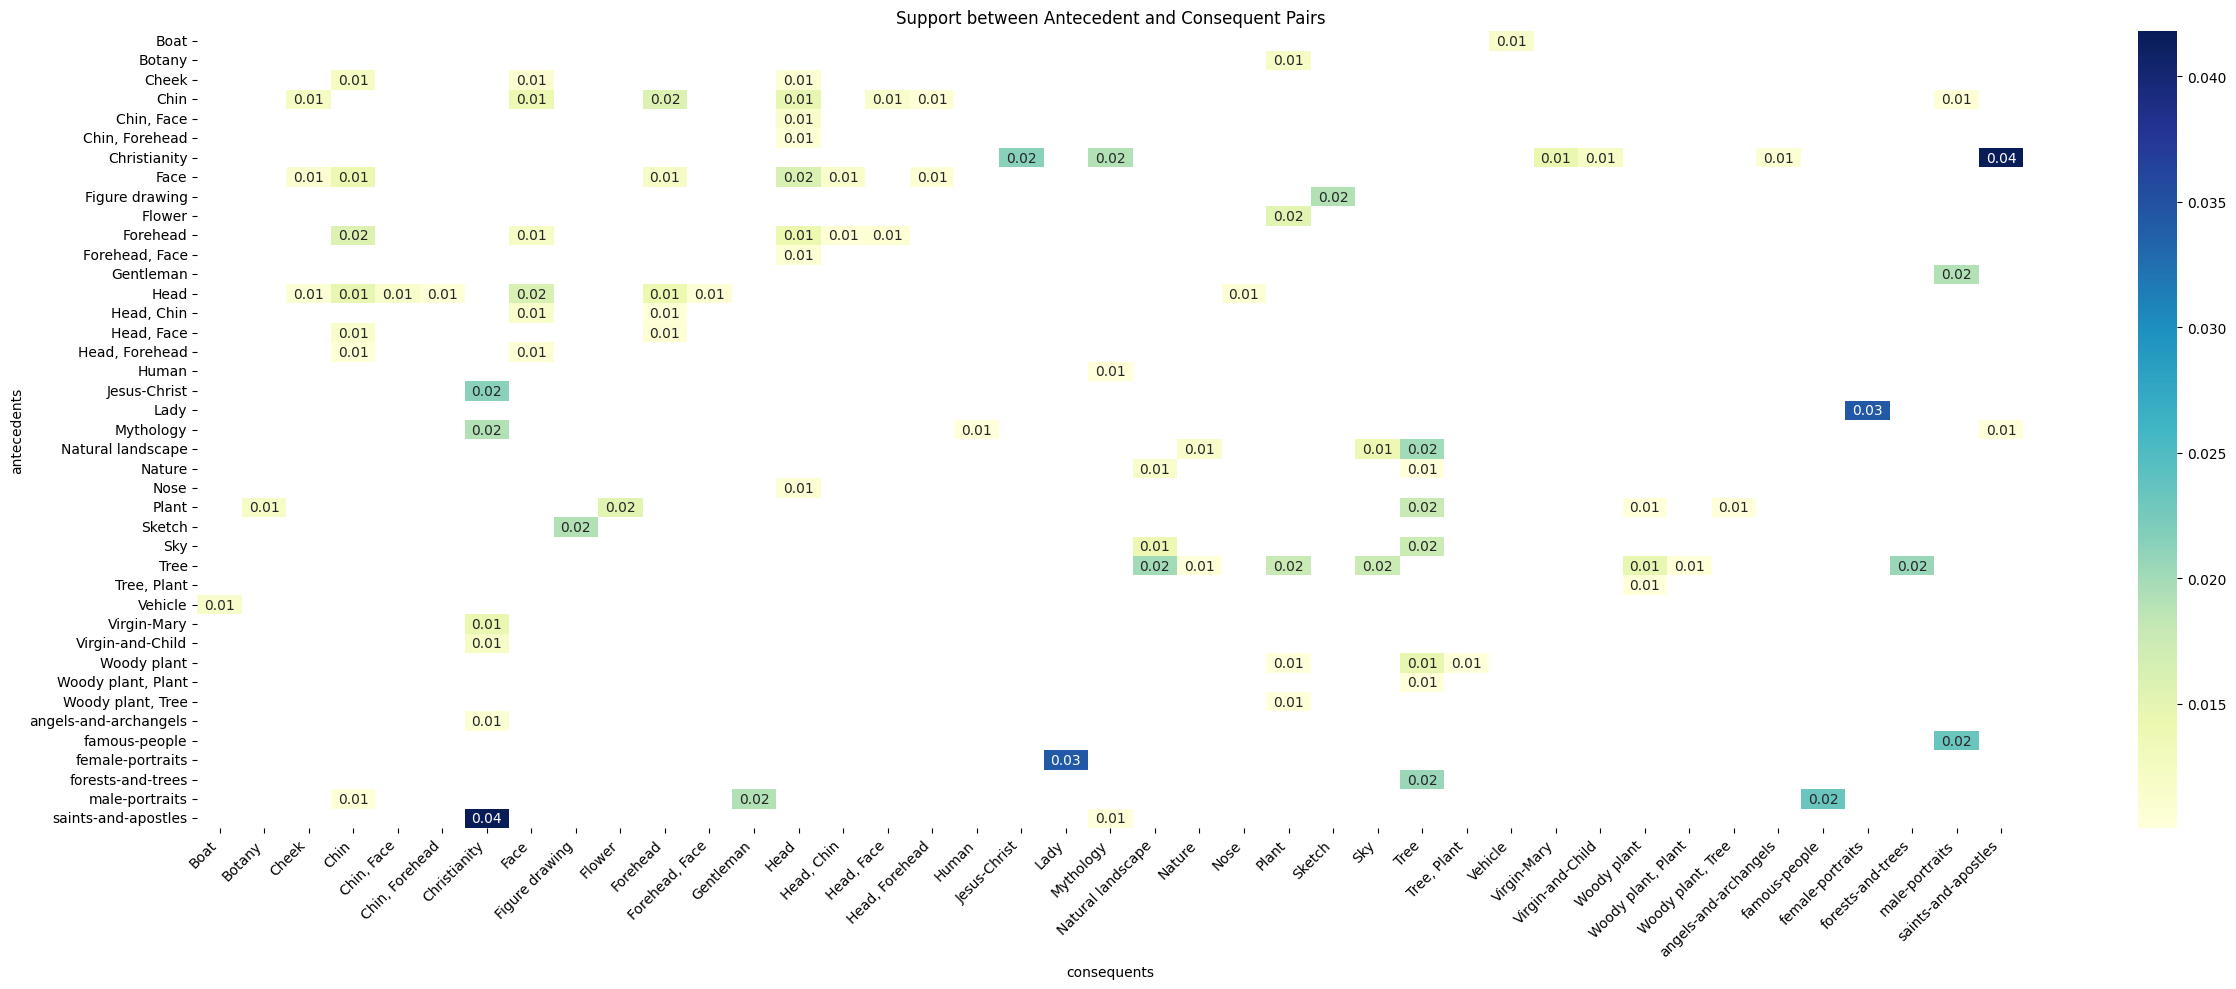

In [24]:
import numpy as np
import seaborn as sns

# Convert frozensets to strings for heatmap indexing
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

pivot = rules.pivot(index='antecedents', columns='consequents', values='support')
plt.figure(figsize=(25, 10))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Support between Antecedent and Consequent Pairs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


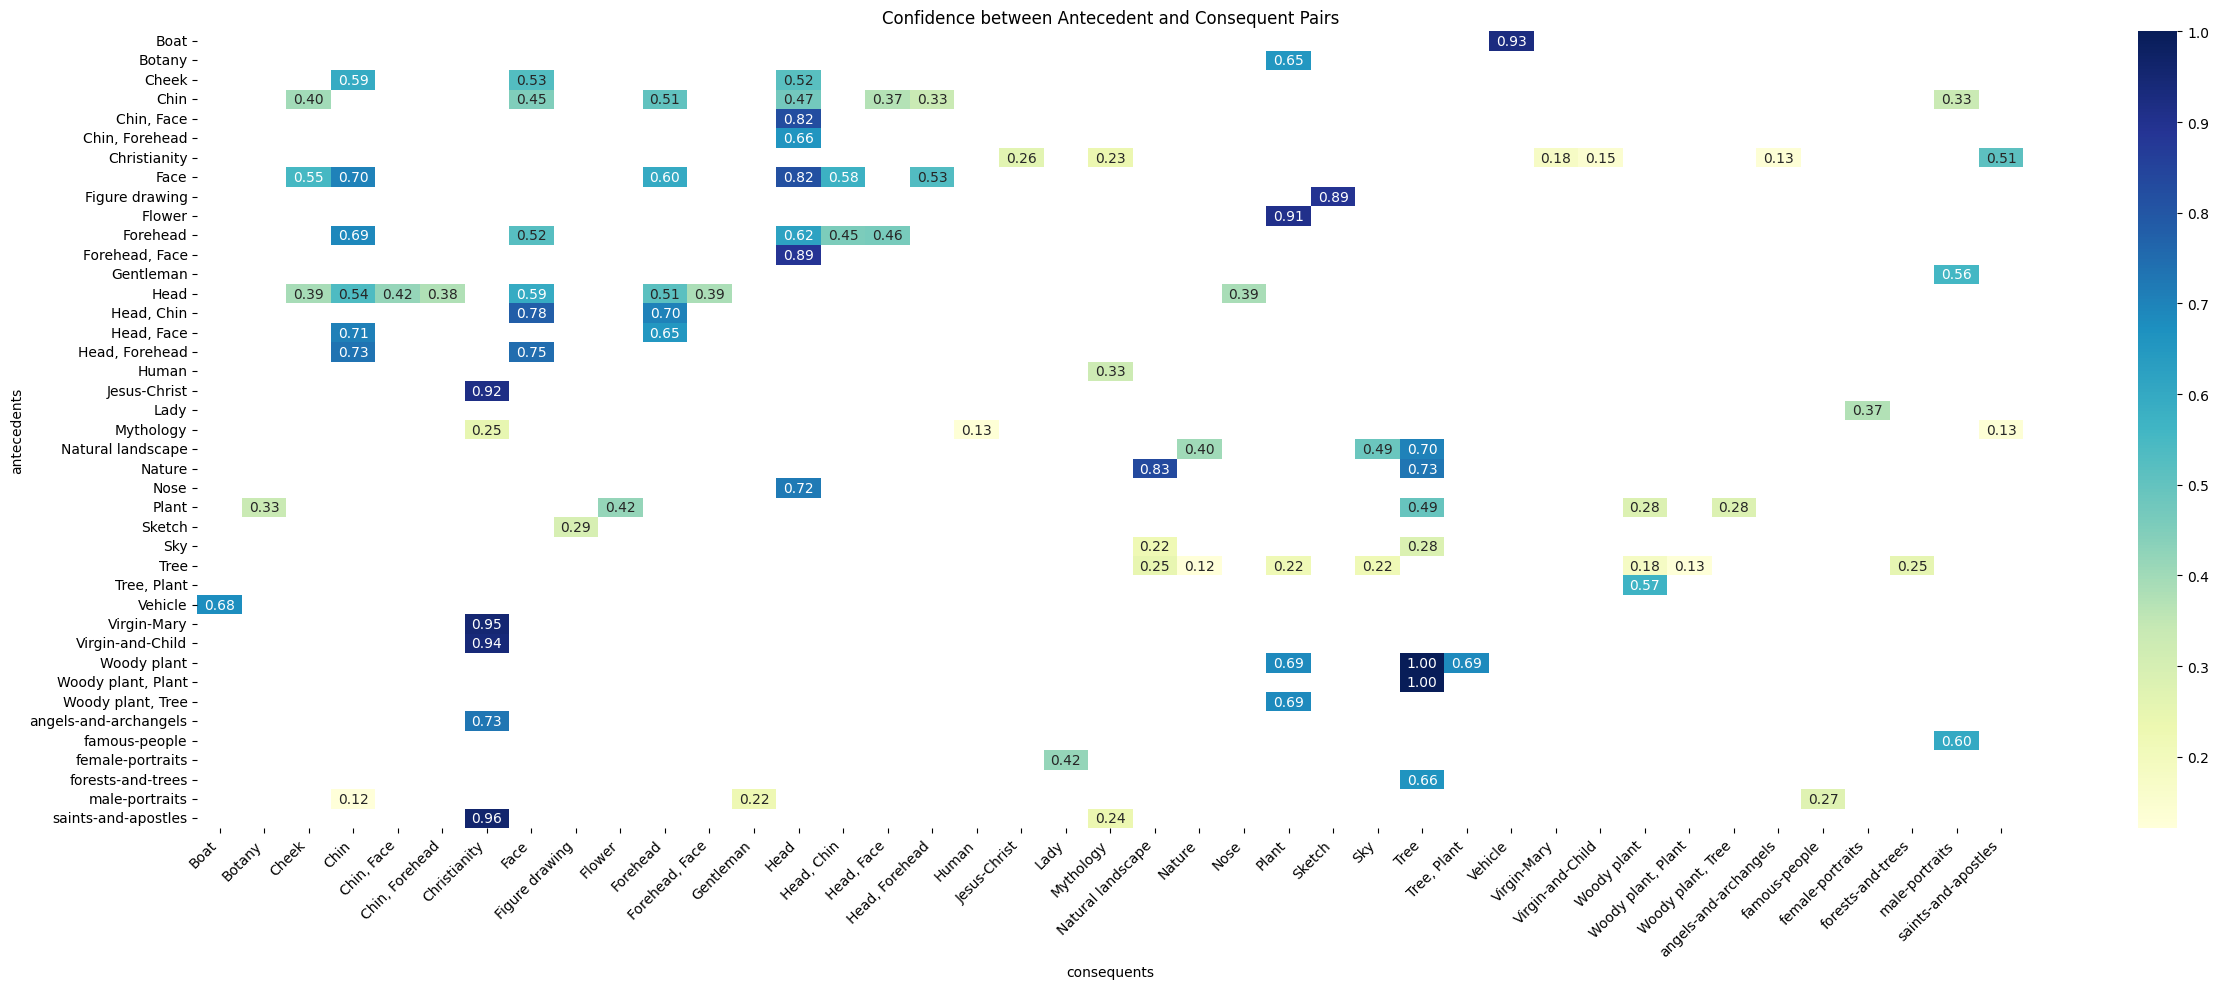

In [27]:
import numpy as np
import seaborn as sns

# Convert frozensets to strings for heatmap indexing
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

pivot = rules.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(25, 10))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Confidence between Antecedent and Consequent Pairs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
# Preprocess: split tags into lists
tag_lists = data['tags'].dropna().apply(lambda x: [t.strip() for t in str(x).split(',') if t.strip()])

# Count co-occurrences
pair_counter = Counter()
triplet_counter = Counter()
quadruplet_counter = Counter()
quintuplet_counter = Counter()
_6_counter = Counter()
_7_counter = Counter()
_8_counter = Counter()
_9_counter = Counter()
_10_counter = Counter()

for tags in tag_lists:
    unique_tags = sorted(set(tags))  # sort for consistency
    pair_counter.update(combinations(unique_tags, 2))
    if len(unique_tags) >= 3:
        triplet_counter.update(combinations(unique_tags, 3))
    if len(unique_tags) >= 4:
        quadruplet_counter.update(combinations(unique_tags, 4))
    if len(unique_tags) >= 5:
        quintuplet_counter.update(combinations(unique_tags, 5))
    if len(unique_tags) >= 6:
        quintuplet_counter.update(combinations(unique_tags, 5))
    if len(unique_tags) >= 7:
        quintuplet_counter.update(combinations(unique_tags, 5))
    if len(unique_tags) >= 8:
        quintuplet_counter.update(combinations(unique_tags, 5))
    if len(unique_tags) >= 9:
        quintuplet_counter.update(combinations(unique_tags, 5))
    if len(unique_tags) >= 10:
        quintuplet_counter.update(combinations(unique_tags, 5))

# Get top N
top_pairs = pair_counter.most_common(20)
top_triplets = triplet_counter.most_common(20)
top_quadruplets = quadruplet_counter.most_common(20)
top_quintuplets = quintuplet_counter.most_common(20)
top_6 = _6_counter.most_common(20)
top_7 = _7_counter.most_common(20)
top_8 = _8_counter.most_common(20)
top_9 = _9_counter.most_common(20)
top_10 = _10_counter.most_common(20)

# Print results
total = len(tag_lists)
print("\n🔗 Top 20 Tag Pairs:")
for pair, count in top_pairs:
    print(f"{pair}: {count} times, support = {count / total:.4f}")

print("\n🔗 Top 10 Tag Triplets:")
for triplet, count in top_triplets:
    print(f"{triplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag Quadruplets:")
for quadruplet, count in top_quadruplets:
    print(f"{quadruplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag Quintuplets:")
for quintuplet, count in top_quintuplets:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag 6:")
for quintuplet, count in top_6:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag 7:")
for quintuplet, count in top_7:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag 8:")
for quintuplet, count in top_8:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag 9:")
for quintuplet, count in top_9:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")
    
print("\n🔗 Top 10 Tag 10:")
for quintuplet, count in top_10:
    print(f"{quintuplet}: {count} times, support = {count / total:.4f}")


🔗 Top 20 Tag Pairs:
('Christianity', 'saints-and-apostles'): 2381 times, support = 0.0418
('Lady', 'female-portraits'): 1951 times, support = 0.0343
('famous-people', 'male-portraits'): 1334 times, support = 0.0234
('Christianity', 'Jesus-Christ'): 1218 times, support = 0.0214
('Tree', 'forests-and-trees'): 1170 times, support = 0.0205
('Natural landscape', 'Tree'): 1139 times, support = 0.0200
('Figure drawing', 'Sketch'): 1092 times, support = 0.0192
('Christianity', 'Mythology'): 1090 times, support = 0.0191
('Gentleman', 'male-portraits'): 1089 times, support = 0.0191
('Plant', 'Tree'): 1012 times, support = 0.0178
('Sky', 'Tree'): 1002 times, support = 0.0176
('Face', 'Head'): 923 times, support = 0.0162
('Chin', 'Forehead'): 893 times, support = 0.0157
('Flower', 'Plant'): 862 times, support = 0.0151
('Chin', 'Head'): 839 times, support = 0.0147
('Tree', 'Woody plant'): 838 times, support = 0.0147
('Christianity', 'Virgin-Mary'): 819 times, support = 0.0144
('Forehead', 'Head'):

following code blocks eliminate/select data

1- Select 25 most represented styles

In [29]:
# Target styles (case-insensitive match for safety)
target_styles = [
    'Abstract expressionism', 'Cubism', 'Baroque', 'Surrealism', 'Academicism', 
    'Expressionism', 'Abstract art', 'Mannerism (Late Renaissance)', 'Naïve art (Primitivism)', 'Art nouveau (Modern)', 
    'Romanticism', 'Rococo', 'Post-impressionism', 'Symbolism', 'Northern renaissance', 
    'Fauvism', 'Lyrical abstraction', 'Realism', 'Impressionism', 'Neoclassicism', 
    'Social realism', 'Neo-romanticism', 'Early renaissance', 'Naturalism', 'Art deco'
]

# Clean the style names for robust comparison
target_styles_lower = [style.lower().strip() for style in target_styles]

# Fix the function
def has_target_style(entry):
    if pd.isna(entry):
        return False
    style_entry = entry.lower()
    styles_in_entry = [s.strip() for s in style_entry.split(',')]
    return any(ts in styles_in_entry for ts in target_styles_lower)

# Apply the filtering
style_filtered_data = data[data['style'].apply(has_target_style)].reset_index(drop=True)

print(f"Filtered dataset shape: {style_filtered_data.shape}")

Filtered dataset shape: (68069, 9)


2- Create broader time intervals/periods for each style

In [30]:
# Define the mapping from style to time period
style_to_period = {
    'Early renaissance': 'Pre-1600',
    'Northern renaissance': 'Pre-1600',
    'Mannerism (Late Renaissance)': 'Pre-1600',
    
    'Baroque': '1600-1800',
    'Rococo': '1600-1800',
    'Neoclassicism': '1600-1800',
    'Romanticism': '1600-1800',
    'Academicism': '1600-1800',
    'Orientalism': '1600-1800',

    'Realism': '1800-1900',
    'Naturalism': '1800-1900',
    'Impressionism': '1800-1900',
    'Post-impressionism': '1800-1900',
    'Symbolism': '1800-1900',
    'Art nouveau (Modern)': '1800-1900',
    'Naïve art (Primitivism)': '1800-1900',

    'Fauvism': '1900-1950',
    'Cubism': '1900-1950',
    'Expressionism': '1900-1950',
    'Abstract art': '1900-1950',
    'Surrealism': '1900-1950',
    'Social realism': '1900-1950',

    'Abstract expressionism': '1950-present',
    'Lyrical abstraction': '1950-present',
    'Neo-romanticism': '1950-present',
    'Art deco': '1950-present'
}

# Lowercase keys for robustness
style_to_period = {k.lower(): v for k, v in style_to_period.items()}

# Function to map each artwork's style entry to a time period
def assign_period(style_entry):
    if pd.isna(style_entry):
        return None
    styles = [s.strip().lower() for s in style_entry.split(',')]
    for style in styles:
        if style in style_to_period:
            return style_to_period[style]
    return None  # if no match

# Apply to create new column
style_filtered_data['time_period'] = style_filtered_data['style'].apply(assign_period)

# Optional: check how many artworks fall into each time period
print(style_filtered_data['time_period'].value_counts())
style_filtered_data


time_period
1800-1900       22250
1600-1800       17727
1900-1950       13891
Pre-1600         7667
1950-present     6534
Name: count, dtype: int64


,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
0,https://www.wikiart.org/en/alvaro-pires-de-evo...,NaN,Álvaro Pires de Évora,47.0,"International Gothic, Early Renaissance",religious painting,NaN,Prophet,https://uploads7.wikiart.org/00312/images/alva...,Pre-1600
1,https://www.wikiart.org/en/alvaro-pires-de-evo...,NaN,Álvaro Pires de Évora,48.0,"International Gothic, Early Renaissance",religious painting,NaN,"Holy places, Prophet",https://uploads4.wikiart.org/00312/images/alva...,Pre-1600
2,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1401.0,Early Renaissance,sculpture,bronze,"Christianity, Old-Testament, Isaac, sacrifices...",https://uploads0.wikiart.org/images/filippo-br...,Pre-1600
3,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1402.0,Early Renaissance,sculpture,NaN,"Christianity, Virgin-and-Child, Classical scul...",https://uploads3.wikiart.org/images/filippo-br...,Pre-1600
4,https://www.wikiart.org/en/ghiberti/the-sacrif...,NaN,Lorenzo Ghiberti,1402.0,Early Renaissance,sculpture,bronze,"Bronze sculpture, Statue, Relief",https://uploads1.wikiart.org/00164/images/ghib...,Pre-1600
...,...,...,...,...,...,...,...,...,...,...
68064,https://www.wikiart.org/en/li-chevalier/human-...,NaN,Li Chevalier,2020.0,"Ink and wash painting, Lyrical Abstraction",shan shui,"ink, acrylic, mixed technique, collage",NaN,https://uploads3.wikiart.org/00330/images/li-c...,1950-present
68065,https://www.wikiart.org/en/li-chevalier/wonder...,NaN,Li Chevalier,2020.0,"Ink and wash painting, Lyrical Abstraction",shan shui,"ink, acrylic, mixed technique, collage",NaN,https://uploads6.wikiart.org/00330/images/li-c...,1950-present
68066,https://www.wikiart.org/en/li-chevalier/incomm...,NaN,Li Chevalier,2021.0,"Ink and wash painting, Lyrical Abstraction",shan shui,"ink, acrylic, mixed technique, collage",NaN,https://uploads4.wikiart.org/00330/images/li-c...,1950-present
68067,https://www.wikiart.org/en/li-chevalier/vestig...,NaN,Li Chevalier,2021.0,"Ink and wash painting, Lyrical Abstraction",shan shui,"ink, acrylic, mixed technique, collage",NaN,https://uploads4.wikiart.org/00330/images/li-c...,1950-present


3- To get a clear labelled styles, select the artworks with only one style in style column

In [31]:
# to select the artworks with only one style
# Define a helper function to count styles
def count_styles(style_str):
    return len([s.strip() for s in style_str.split(',')])

mask = (style_filtered_data['style'].apply(count_styles) == 1)

# Filter the dataset
style_filtered_data_only_one_style = style_filtered_data[mask].reset_index(drop=True)

# Optional: check how many artworks fall into each time period
print(style_filtered_data_only_one_style['time_period'].value_counts())

style_filtered_data_only_one_style

time_period
1800-1900       20517
1600-1800       15866
1900-1950       11581
Pre-1600         7517
1950-present     5739
Name: count, dtype: int64


,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
0,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1401.0,Early Renaissance,sculpture,bronze,"Christianity, Old-Testament, Isaac, sacrifices...",https://uploads0.wikiart.org/images/filippo-br...,Pre-1600
1,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1402.0,Early Renaissance,sculpture,NaN,"Christianity, Virgin-and-Child, Classical scul...",https://uploads3.wikiart.org/images/filippo-br...,Pre-1600
2,https://www.wikiart.org/en/ghiberti/the-sacrif...,NaN,Lorenzo Ghiberti,1402.0,Early Renaissance,sculpture,bronze,"Bronze sculpture, Statue, Relief",https://uploads1.wikiart.org/00164/images/ghib...,Pre-1600
3,https://www.wikiart.org/en/lorenzo-monaco/anti...,NaN,Lorenzo Monaco,1404.0,Early Renaissance,religious painting,NaN,Textile,https://uploads7.wikiart.org/00207/images/lore...,Pre-1600
4,https://www.wikiart.org/en/filippo-brunellesch...,NaN,Filippo Brunelleschi,1405.0,Early Renaissance,sculpture,NaN,"Christianity, Virgin-and-Child, Statue, Classi...",https://uploads6.wikiart.org/images/filippo-br...,Pre-1600
...,...,...,...,...,...,...,...,...,...,...
61215,https://www.wikiart.org/en/charles-gibbons/ens...,NaN,Charles Gibbons,2018.0,Lyrical Abstraction,abstract,NaN,"Violet, Text, Font, Line, Graphic design",https://uploads7.wikiart.org/00221/images/char...,1950-present
61216,https://www.wikiart.org/en/charles-gibbons/cou...,NaN,Charles Gibbons,2018.0,Lyrical Abstraction,abstract,NaN,NaN,https://uploads2.wikiart.org/00221/images/char...,1950-present
61217,https://www.wikiart.org/en/li-chevalier/au-bor...,NaN,Li Chevalier,2018.0,Lyrical Abstraction,symbolic painting,ink,Water,https://uploads0.wikiart.org/00307/images/li-c...,1950-present
61218,https://www.wikiart.org/en/howardena-pindell/s...,NaN,Howardena Pindell,2018.0,Lyrical Abstraction,abstract,NaN,NaN,https://uploads7.wikiart.org/00335/images/howa...,1950-present


In [ ]:
# Group by time_period and style to count artworks
artwork_counts = (
    style_filtered_data_only_one_style
    .groupby(['time_period', 'style'])
    .size()
    .reset_index(name='artwork_count')
)

# For readability: sort by time_period then by number of artworks descending
artwork_counts = artwork_counts.sort_values(['time_period', 'artwork_count'], ascending=[True, False])

# 1. Number of unique artworks per time interval
print("Number of unique artists per time period:")
unique_artworks_per_period = artwork_counts.groupby('time_period')['style'].nunique()
print(unique_artworks_per_period, "\n")

# 2. Artwork count per style in each time interval
print("Artwork count per artist in each time period:")
for period, group in artwork_counts.groupby('time_period'):
    print(f"\n=== {period} ===")
    print(group[['style', 'artwork_count']].to_string(index=False))



Number of unique artists per time period:
time_period
1600-1800       5
1800-1900       7
1900-1950       6
1950-present    4
Pre-1600        3
Name: style, dtype: int64 

Artwork count per artist in each time period:

=== 1600-1800 ===
        style  artwork_count
  Romanticism           3429
       Rococo           3391
Neoclassicism           3388
      Baroque           3354
  Academicism           2304

=== 1800-1900 ===
                  style  artwork_count
          Impressionism           3495
     Post-Impressionism           3419
                Realism           3372
   Art Nouveau (Modern)           3269
              Symbolism           3132
Naïve Art (Primitivism)           3125
             Naturalism            705

=== 1900-1950 ===
         style  artwork_count
 Expressionism           3125
    Surrealism           3085
        Cubism           2307
  Abstract Art           1475
       Fauvism            885
Social Realism            704

=== 1950-present ===
       

To have a bigger dataset, recover from multiple style labelled artworks

In [33]:
# Recover styles with less examples
# Step 1: Define lost styles manually
lost_styles = ['Naturalism', 'Fauvism', 'Social Realism', 'Abstract Art',
               'Art Deco', 'Lyrical Abstraction', 'Neo-Romanticism']  # fill this manually later, e.g. ['mannerism', 'rococo']

# Step 2: Extract and reassign those lost styles with partial matching
recovered_rows = []

for lost_style in lost_styles:
    # Partial and case-insensitive match (loose matching)
    rows_with_style = style_filtered_data[
        style_filtered_data['style']
        .str.contains(lost_style, case=False, na=False)
    ].copy()

    if not rows_with_style.empty:
        # Normalize style label to clean version
        rows_with_style['style'] = lost_style

        # Assign correct time period
        rows_with_style['time_period'] = style_to_period.get(lost_style.lower(), None)

        recovered_rows.append(rows_with_style)

# Step 3: Combine recovered rows into a DataFrame
if recovered_rows:
    recovered_df = pd.concat(recovered_rows, ignore_index=True)
else:
    recovered_df = pd.DataFrame(columns=style_filtered_data.columns)

# Step 4: Concatenate with the clean single-style DataFrame
style_filtered_data_final = pd.concat(
    [style_filtered_data_only_one_style, recovered_df],
    ignore_index=True
)

# Optional: Drop duplicates (if same row appears twice)
style_filtered_data_final = style_filtered_data_final.drop_duplicates()

# Final check
print("✅ Final style distribution after partial matching recovery:")
print(style_filtered_data_final['style'].value_counts())

✅ Final style distribution after partial matching recovery:
style
Impressionism                   3495
Romanticism                     3429
Post-Impressionism              3419
Rococo                          3391
Neoclassicism                   3388
Realism                         3372
Baroque                         3354
Art Nouveau (Modern)            3269
Northern Renaissance            3218
Symbolism                       3132
Expressionism                   3125
Naïve Art (Primitivism)         3125
Surrealism                      3085
Abstract Expressionism          3063
Mannerism (Late Renaissance)    2447
Cubism                          2307
Academicism                     2304
Early Renaissance               1852
Abstract Art                    1756
Lyrical Abstraction             1241
Fauvism                         1228
Art Deco                        1032
Social Realism                   919
Naturalism                       882
Neo-Romanticism                  827
Name: cou

In [34]:
print(style_filtered_data_final['time_period'].value_counts())

time_period
1800-1900       20694
1600-1800       15866
1900-1950       12420
Pre-1600         7517
1950-present     6163
Name: count, dtype: int64


Clean data from non-painting artworks

In [44]:
# Drop rows where 'genre' contains 'photo' or 'sculpture' (case-insensitive)
style_filtered_data_final = style_filtered_data_final[~style_filtered_data_final['genre']
    .str.lower()
    .str.contains('photo|sculpture', na=False)]
style_filtered_data_final

,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
3,https://www.wikiart.org/en/lorenzo-monaco/anti...,NaN,Lorenzo Monaco,1404.0,Early Renaissance,religious painting,unknown,Textile,https://uploads7.wikiart.org/00207/images/lore...,Pre-1600
5,https://www.wikiart.org/en/lorenzo-monaco/chri...,NaN,Lorenzo Monaco,1408.0,Early Renaissance,religious painting,unknown,"Holy places, Prophet",https://uploads1.wikiart.org/00207/images/lore...,Pre-1600
7,https://www.wikiart.org/en/fra-angelico/thebaid,NaN,Fra Angelico,1410.0,Early Renaissance,religious painting,unknown,"Christianity, saints-and-apostles",https://uploads0.wikiart.org/images/fra-angeli...,Pre-1600
10,https://www.wikiart.org/en/domenico-veneziano/...,NaN,Domenico Veneziano,1410.0,Early Renaissance,religious painting,"wood, tempera","Christianity, Jesus-Christ, Virgin-Mary",https://uploads6.wikiart.org/images/domenico-v...,Pre-1600
11,https://www.wikiart.org/en/lorenzo-monaco/cruc...,NaN,Lorenzo Monaco,1410.0,Early Renaissance,religious painting,unknown,"Religious item, Crucifix, Cross, Symbol",https://uploads7.wikiart.org/00207/images/lore...,Pre-1600
...,...,...,...,...,...,...,...,...,...,...
68830,https://www.wikiart.org/en/leonor-fini/self-po...,NaN,Leonor Fini,1938.0,Neo-Romanticism,self-portrait,unknown,Lady,https://uploads5.wikiart.org/00452/images/leon...,1950-present
69001,https://www.wikiart.org/en/graham-sutherland/a...,NaN,Graham Sutherland,1957.0,Neo-Romanticism,still life,unknown,"Leaf, Botany, Plant, Flower",https://uploads0.wikiart.org/00229/images/grah...,1950-present
69002,https://www.wikiart.org/en/graham-sutherland/s...,NaN,Graham Sutherland,1957.0,Neo-Romanticism,cityscape,unknown,"Landmark, Dome, Byzantine architecture, Building",https://uploads7.wikiart.org/00229/images/grah...,1950-present
69089,https://www.wikiart.org/en/konstantin-vasilyev...,NaN,Konstantin Vasilyev,1974.0,Neo-Romanticism,portrait,unknown,"animals, female-portraits, dogs, Long hair",https://uploads1.wikiart.org/images/konstantin...,1950-present


In [49]:
print(style_filtered_data_final['style'].value_counts())

style
Impressionism                   3476
Romanticism                     3429
Post-Impressionism              3406
Baroque                         3332
Realism                         3329
Neoclassicism                   3328
Rococo                          3326
Art Nouveau (Modern)            3263
Northern Renaissance            3215
Naïve Art (Primitivism)         3110
Symbolism                       3102
Expressionism                   3098
Abstract Expressionism          2913
Surrealism                      2830
Mannerism (Late Renaissance)    2348
Academicism                     2269
Cubism                          2199
Early Renaissance               1770
Abstract Art                    1607
Lyrical Abstraction             1236
Fauvism                         1228
Art Deco                         968
Naturalism                       882
Neo-Romanticism                  827
Social Realism                   816
Name: count, dtype: int64


Randomly select 827 artworks from each style

In [ ]:
# Randomly select 827 artworks from each style
balanced_data = (
    style_filtered_data_final
    .groupby('style', group_keys=False)
    .apply(lambda x: x.sample(n=827, random_state=45) if len(x) >= 827 else pd.DataFrame())
    .reset_index(drop=True)
)

print(f"Balanced dataset created with {len(balanced_data)} rows.")
print("Styles included:", balanced_data['style'].nunique())
balanced_data

Balanced dataset created with 19584 rows.
Styles included: 24


C:\Users\User\AppData\Local\Temp\ipykernel_18264\2632122717.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=816, random_state=45) if len(x) >= 827 else pd.DataFrame())


,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
0,https://www.wikiart.org/en/victor-hugo/silhoue...,NaN,Victor Hugo,1854.0,Abstract Art,abstract,unknown,NaN,https://uploads0.wikiart.org/images/victor-hug...,1900-1950
1,https://www.wikiart.org/en/tihamer-gyarmathy/u...,NaN,Tihamer Gyarmathy,1980.0,Abstract Art,abstract,unknown,NaN,https://uploads6.wikiart.org/images/tihamer-gy...,1900-1950
2,https://www.wikiart.org/en/janos-mattis-teutsc...,NaN,Janos Mattis-Teutsch,1918.0,Abstract Art,abstract,unknown,Pink,https://uploads1.wikiart.org/images/janos-matt...,1900-1950
3,https://www.wikiart.org/en/willi-baumeister/pe...,NaN,Willi Baumeister,1942.0,Abstract Art,abstract,unknown,Font,https://uploads4.wikiart.org/images/willi-baum...,1900-1950
4,https://www.wikiart.org/en/marcel-janco/euphor...,NaN,Marcel Janco,1917.0,Abstract Art,abstract,unknown,NaN,https://uploads2.wikiart.org/images/marcel-jan...,1900-1950
...,...,...,...,...,...,...,...,...,...,...
19579,https://www.wikiart.org/en/konstantin-somov/la...,NaN,Konstantin Somov,1912.0,Symbolism,genre painting,"gouache, watercolor, paper","couples, celebrations-and-festivals, Lady",https://uploads6.wikiart.org/images/konstantin...,1800-1900
19580,https://www.wikiart.org/en/ferdinand-hodler/la...,NaN,Ferdinand Hodler,1906.0,Symbolism,sketch and study,unknown,"lakes-and-ponds, Alps, mountains, Line, Sketch",https://uploads5.wikiart.org/images/ferdinand-...,1800-1900
19581,https://www.wikiart.org/en/jan-mankes/young-wh...,NaN,Jan Mankes,1914.0,Symbolism,animal painting,unknown,NaN,https://uploads3.wikiart.org/00320/images/jan-...,1800-1900
19582,https://www.wikiart.org/en/eugene-jansson/dusk...,NaN,Eugène Jansson,1895.0,Symbolism,cityscape,unknown,NaN,https://uploads6.wikiart.org/00319/images/euge...,1800-1900


Plot for eliminated data

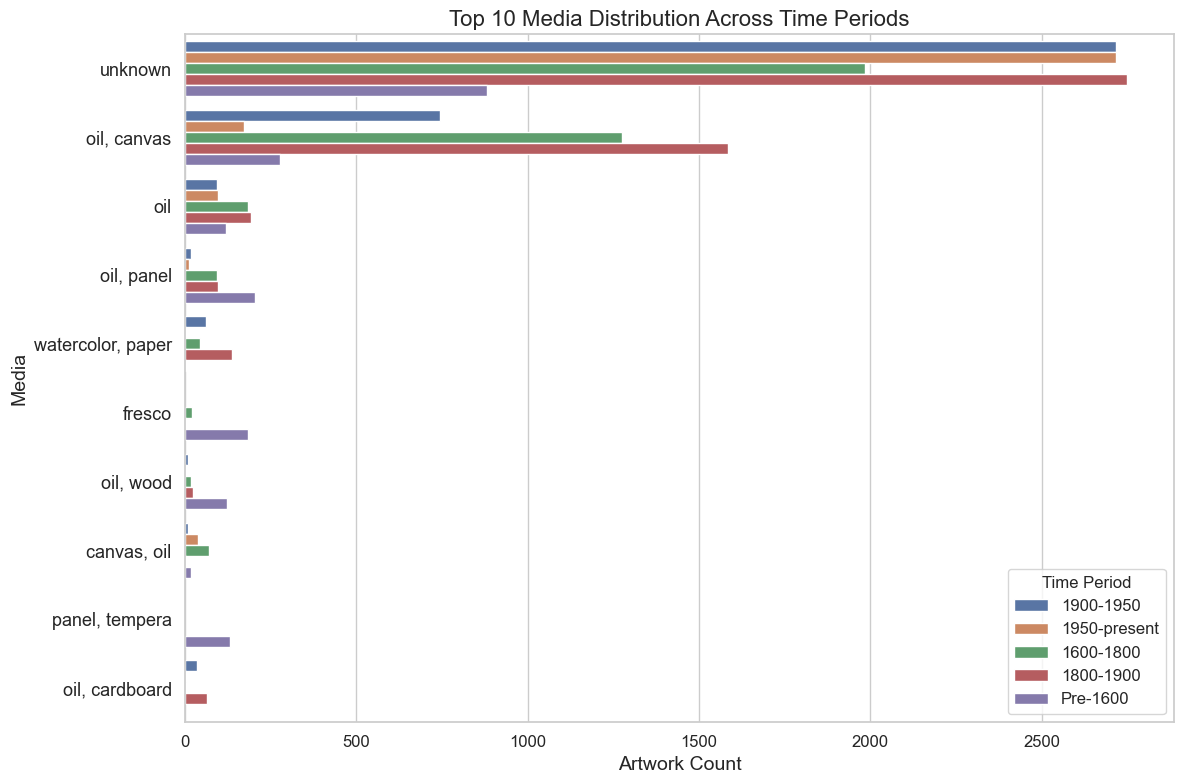

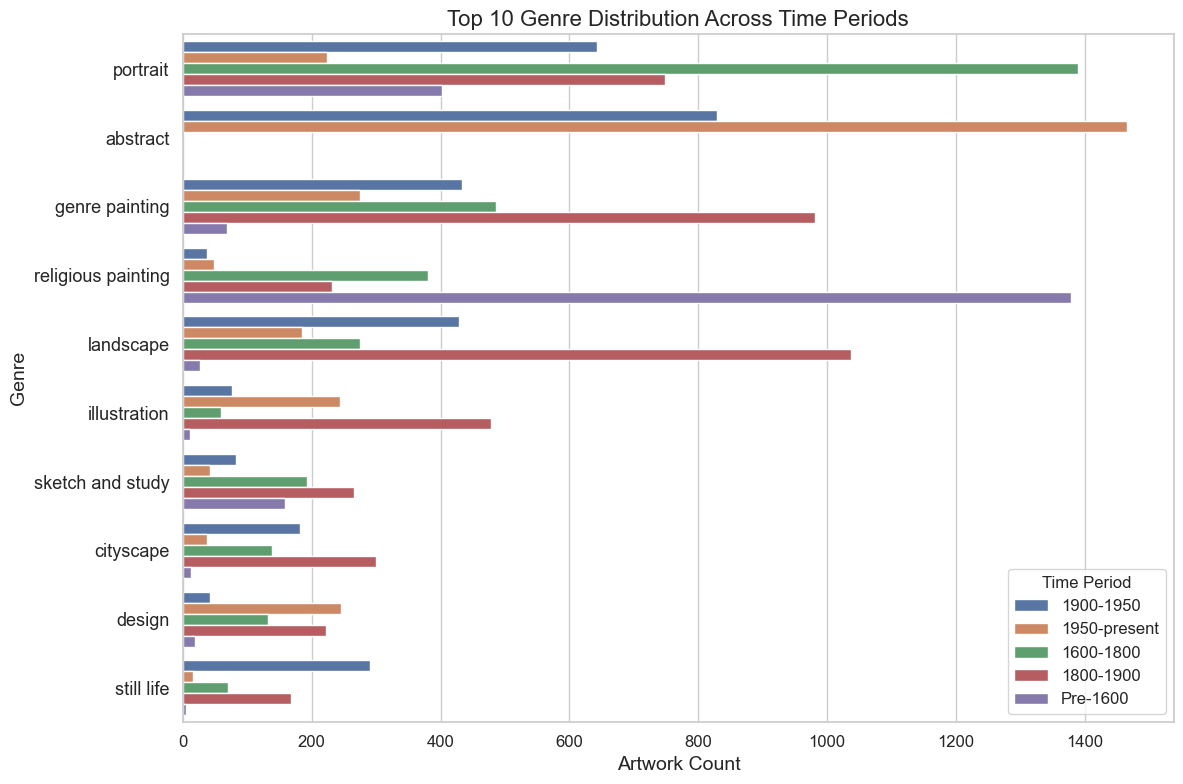

In [51]:
# Fill nulls
balanced_data['media'] = balanced_data['media'].fillna('unknown')
balanced_data['genre'] = balanced_data['genre'].fillna('unknown')

# Get top 10 media and genre
top_media = balanced_data['media'].value_counts().head(10).index
top_genre = balanced_data['genre'].value_counts().head(10).index

# Filter for top media and genre
filtered_media_data = balanced_data[balanced_data['media'].isin(top_media)]
filtered_genre_data = balanced_data[balanced_data['genre'].isin(top_genre)]

# Plot: Top 10 Media
plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_media_data,
    y='media',
    hue='time_period',
    order=top_media
)
plt.title("Top 10 Media Distribution Across Time Periods", fontsize=16)
plt.xlabel("Artwork Count", fontsize=14)
plt.ylabel("Media", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend(title="Time Period", fontsize=12)
plt.tight_layout()
plt.show()

# Plot: Top 10 Genre
plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_genre_data,
    y='genre',
    hue='time_period',
    order=top_genre
)
plt.title("Top 10 Genre Distribution Across Time Periods", fontsize=16)
plt.xlabel("Artwork Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend(title="Time Period", fontsize=12)
plt.tight_layout()
plt.show()

Map the similar media types to one to obtain a more representative and understandable plot

In [53]:
import re

# Define the media mapping (lowercase for case-insensitive match)
media_map = {
    'oil color': ['oil', 'magna'],
    'watercolor': ['watercolor', 'sepia'],
    'pastel': ['pastel', 'crayon'],
    'tempera': ['tempera'],
    'pencil': [
        'pencil', 'ink', 'charcoal', 'pen', 'drawing', 'graphite',
        'leadpoint', 'metalpoint', 'sanguine', 'coal', 'colored pencils'
    ],
    'printing-tinting': [
        'lithography', 'etching', 'engraving', 'aquatint', 'drypoint',
        'linocut', 'mezzotint'
    ],
    'fresco': ['fresco'],
    'gouache': ['gouache', 'acrylic'],
    'chalk': ['chalk'],
    'mixed': ['mixed technique', 'mixed media']
}

def map_media(entry):
    if pd.isna(entry):
        return entry  # Keep NaN
    entry = entry.lower()
    matched_categories = set()

    for category, keywords in media_map.items():
        for kw in keywords:
            if kw in entry:
                matched_categories.add(category)
                break  # No need to check other keywords for this category

    if matched_categories:
        return ', '.join(sorted(matched_categories))
    else:
        return entry  # Keep original if no match

# Apply the mapping
balanced_data['media'] = balanced_data['media'].apply(map_media)
balanced_data

,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
0,https://www.wikiart.org/en/victor-hugo/silhoue...,NaN,Victor Hugo,1854.0,Abstract Art,abstract,unknown,NaN,https://uploads0.wikiart.org/images/victor-hug...,1900-1950
1,https://www.wikiart.org/en/tihamer-gyarmathy/u...,NaN,Tihamer Gyarmathy,1980.0,Abstract Art,abstract,unknown,NaN,https://uploads6.wikiart.org/images/tihamer-gy...,1900-1950
2,https://www.wikiart.org/en/janos-mattis-teutsc...,NaN,Janos Mattis-Teutsch,1918.0,Abstract Art,abstract,unknown,Pink,https://uploads1.wikiart.org/images/janos-matt...,1900-1950
3,https://www.wikiart.org/en/willi-baumeister/pe...,NaN,Willi Baumeister,1942.0,Abstract Art,abstract,unknown,Font,https://uploads4.wikiart.org/images/willi-baum...,1900-1950
4,https://www.wikiart.org/en/marcel-janco/euphor...,NaN,Marcel Janco,1917.0,Abstract Art,abstract,unknown,NaN,https://uploads2.wikiart.org/images/marcel-jan...,1900-1950
...,...,...,...,...,...,...,...,...,...,...
19579,https://www.wikiart.org/en/konstantin-somov/la...,NaN,Konstantin Somov,1912.0,Symbolism,genre painting,"gouache, watercolor","couples, celebrations-and-festivals, Lady",https://uploads6.wikiart.org/images/konstantin...,1800-1900
19580,https://www.wikiart.org/en/ferdinand-hodler/la...,NaN,Ferdinand Hodler,1906.0,Symbolism,sketch and study,unknown,"lakes-and-ponds, Alps, mountains, Line, Sketch",https://uploads5.wikiart.org/images/ferdinand-...,1800-1900
19581,https://www.wikiart.org/en/jan-mankes/young-wh...,NaN,Jan Mankes,1914.0,Symbolism,animal painting,unknown,NaN,https://uploads3.wikiart.org/00320/images/jan-...,1800-1900
19582,https://www.wikiart.org/en/eugene-jansson/dusk...,NaN,Eugène Jansson,1895.0,Symbolism,cityscape,unknown,NaN,https://uploads6.wikiart.org/00319/images/euge...,1800-1900


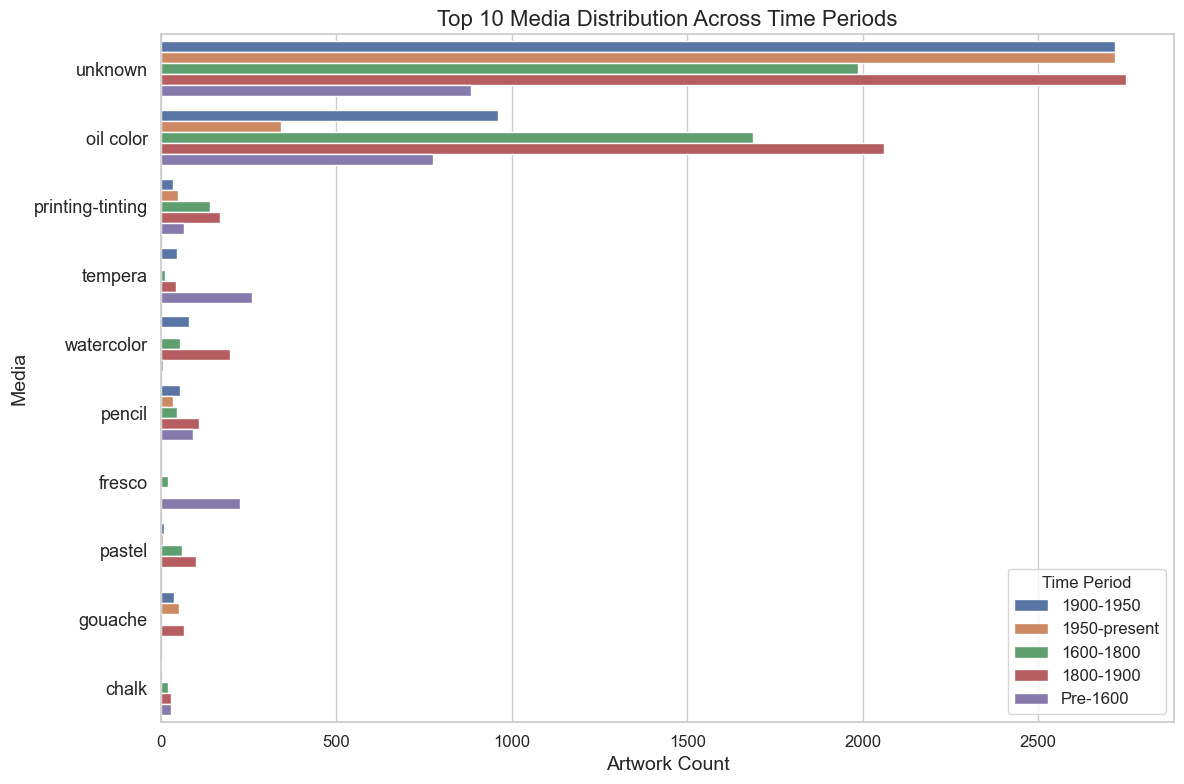

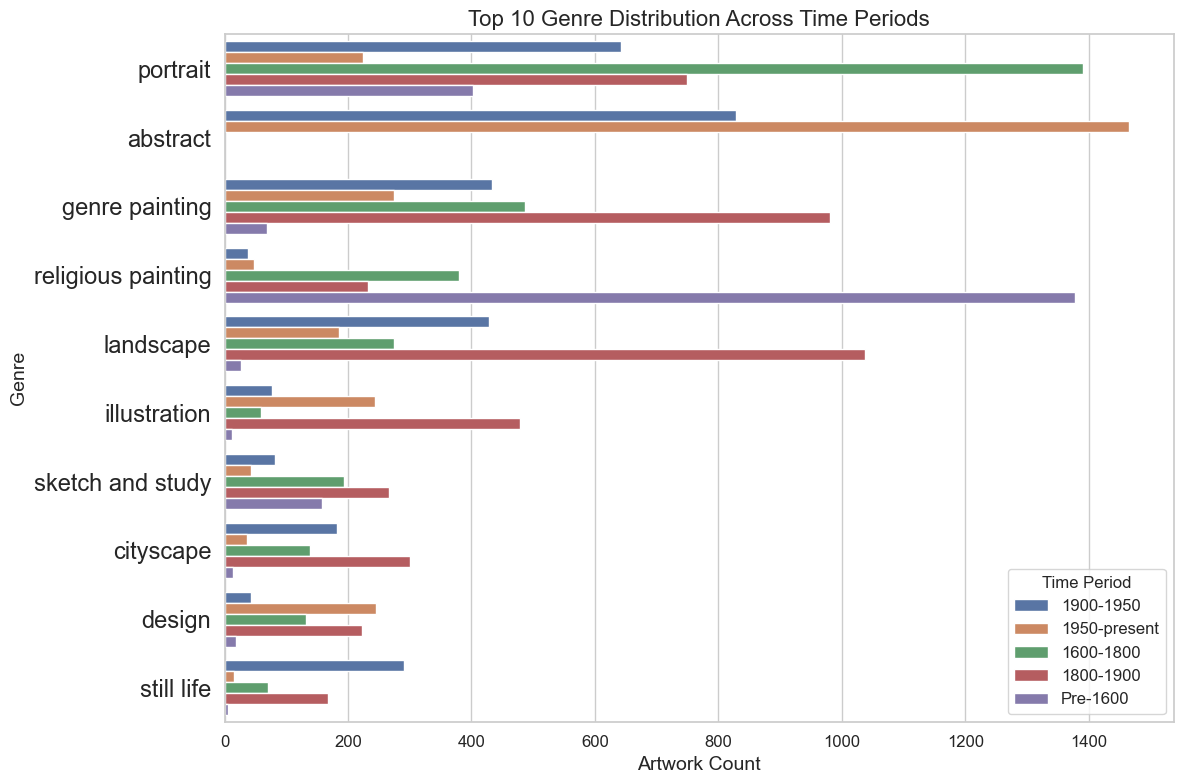

In [57]:
# Get top 10 media and genre
top_media = balanced_data['media'].value_counts().head(10).index
top_genre = balanced_data['genre'].value_counts().head(10).index

# Filter for top media and genre
filtered_media_data = balanced_data[balanced_data['media'].isin(top_media)]
filtered_genre_data = balanced_data[balanced_data['genre'].isin(top_genre)]

# Plot: Top 10 Media
plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_media_data,
    y='media',
    hue='time_period',
    order=top_media
)
plt.title("Top 10 Media Distribution Across Time Periods", fontsize=16)
plt.xlabel("Artwork Count", fontsize=14)
plt.ylabel("Media", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend(title="Time Period", fontsize=12)
plt.tight_layout()
plt.show()

# Plot: Top 10 Genre
plt.figure(figsize=(12, 8))
sns.countplot(
    data=filtered_genre_data,
    y='genre',
    hue='time_period',
    order=top_genre
)
plt.title("Top 10 Genre Distribution Across Time Periods", fontsize=16)
plt.xlabel("Artwork Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=17)
plt.legend(title="Time Period", fontsize=12)
plt.tight_layout()
plt.show()

In [58]:
balanced_data

,url,artwork_name,artist_name,date,style,genre,media,tags,image_url,time_period
0,https://www.wikiart.org/en/victor-hugo/silhoue...,NaN,Victor Hugo,1854.0,Abstract Art,abstract,unknown,NaN,https://uploads0.wikiart.org/images/victor-hug...,1900-1950
1,https://www.wikiart.org/en/tihamer-gyarmathy/u...,NaN,Tihamer Gyarmathy,1980.0,Abstract Art,abstract,unknown,NaN,https://uploads6.wikiart.org/images/tihamer-gy...,1900-1950
2,https://www.wikiart.org/en/janos-mattis-teutsc...,NaN,Janos Mattis-Teutsch,1918.0,Abstract Art,abstract,unknown,Pink,https://uploads1.wikiart.org/images/janos-matt...,1900-1950
3,https://www.wikiart.org/en/willi-baumeister/pe...,NaN,Willi Baumeister,1942.0,Abstract Art,abstract,unknown,Font,https://uploads4.wikiart.org/images/willi-baum...,1900-1950
4,https://www.wikiart.org/en/marcel-janco/euphor...,NaN,Marcel Janco,1917.0,Abstract Art,abstract,unknown,NaN,https://uploads2.wikiart.org/images/marcel-jan...,1900-1950
...,...,...,...,...,...,...,...,...,...,...
19579,https://www.wikiart.org/en/konstantin-somov/la...,NaN,Konstantin Somov,1912.0,Symbolism,genre painting,"gouache, watercolor","couples, celebrations-and-festivals, Lady",https://uploads6.wikiart.org/images/konstantin...,1800-1900
19580,https://www.wikiart.org/en/ferdinand-hodler/la...,NaN,Ferdinand Hodler,1906.0,Symbolism,sketch and study,unknown,"lakes-and-ponds, Alps, mountains, Line, Sketch",https://uploads5.wikiart.org/images/ferdinand-...,1800-1900
19581,https://www.wikiart.org/en/jan-mankes/young-wh...,NaN,Jan Mankes,1914.0,Symbolism,animal painting,unknown,NaN,https://uploads3.wikiart.org/00320/images/jan-...,1800-1900
19582,https://www.wikiart.org/en/eugene-jansson/dusk...,NaN,Eugène Jansson,1895.0,Symbolism,cityscape,unknown,NaN,https://uploads6.wikiart.org/00319/images/euge...,1800-1900


Save balanced data for future use

In [59]:
balanced_data.to_csv('balanced_data.csv', index=False)